In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [50]:
df_covid_tweets = pd.read_csv('covid_tweets_detail.csv')
df_covid_tweets_stats = df_covid_tweets.copy()
df_covid_tweets_stats = df_covid_tweets_stats.drop(['word from wordlist', 'match', 'original tweet', 'tweet', 'id'], axis='columns')
df_covid_tweets_stats['created at']=pd.to_datetime(df_covid_tweets_stats['created at'], utc= True).dt.date

parties = df_covid_tweets_stats['party'].unique()

df_non_covid_tweets = pd.read_csv('non_covid_tweets.csv')
df_non_covid_tweets_stats = df_non_covid_tweets.copy()
df_non_covid_tweets_stats = df_non_covid_tweets_stats.drop(['tweet'], axis='columns')
df_non_covid_tweets_stats['created at']=pd.to_datetime(df_non_covid_tweets_stats['created at'], utc= True).dt.date

start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

year = {
    'January': '01/31/2020',
    'February': '02/29/2020',
    'March': '03/31/2020',
    'April': '04/30/2020',
    'May': '05/31/2020',
    'June': '06/30/2020',
    'July': '07/31/2020',
    'August': '08/1/2020',
    'September': '09/30/2020',
    'October': '10/31/2020',
    'November': '11/30/2020',
    'December': '12/31/2020',
}

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]

# Number of Covid-Tweets per Party per Month (cumulated)

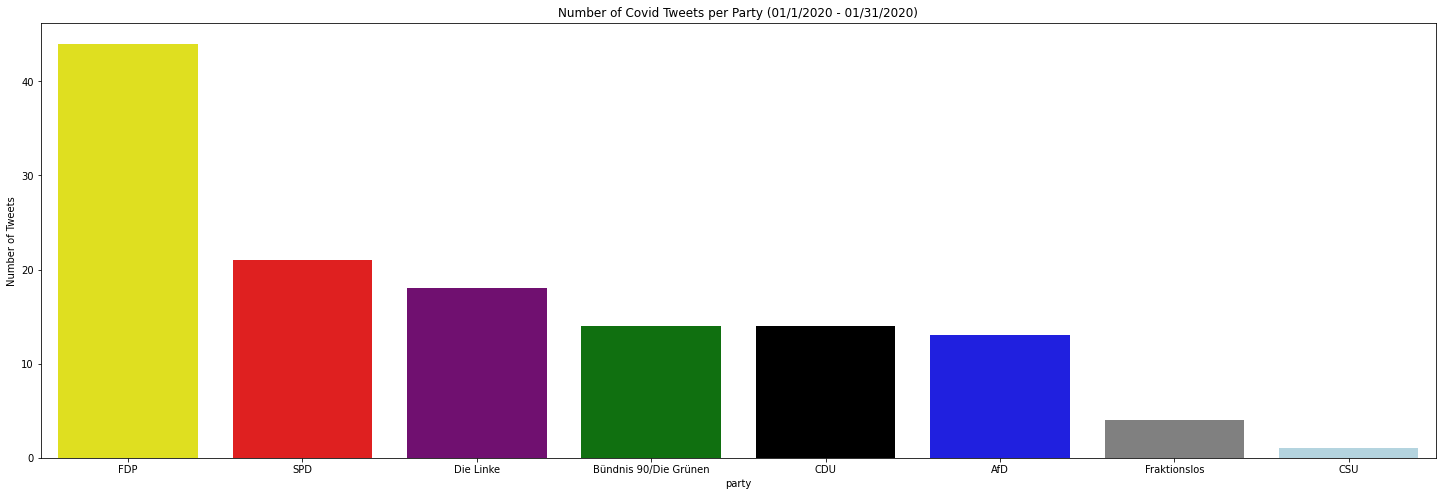

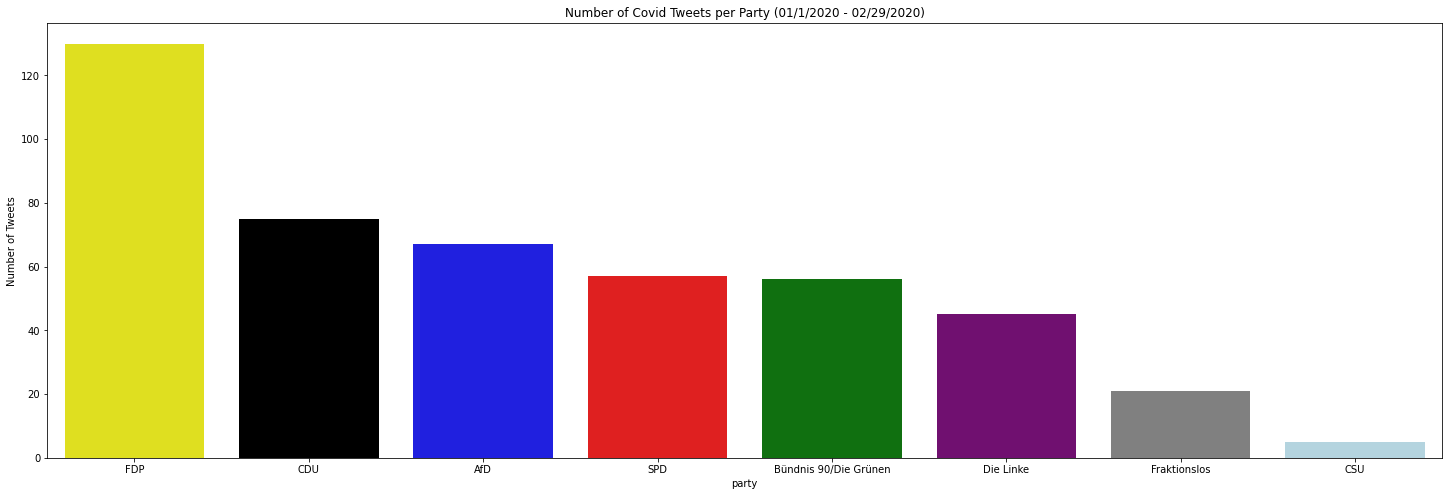

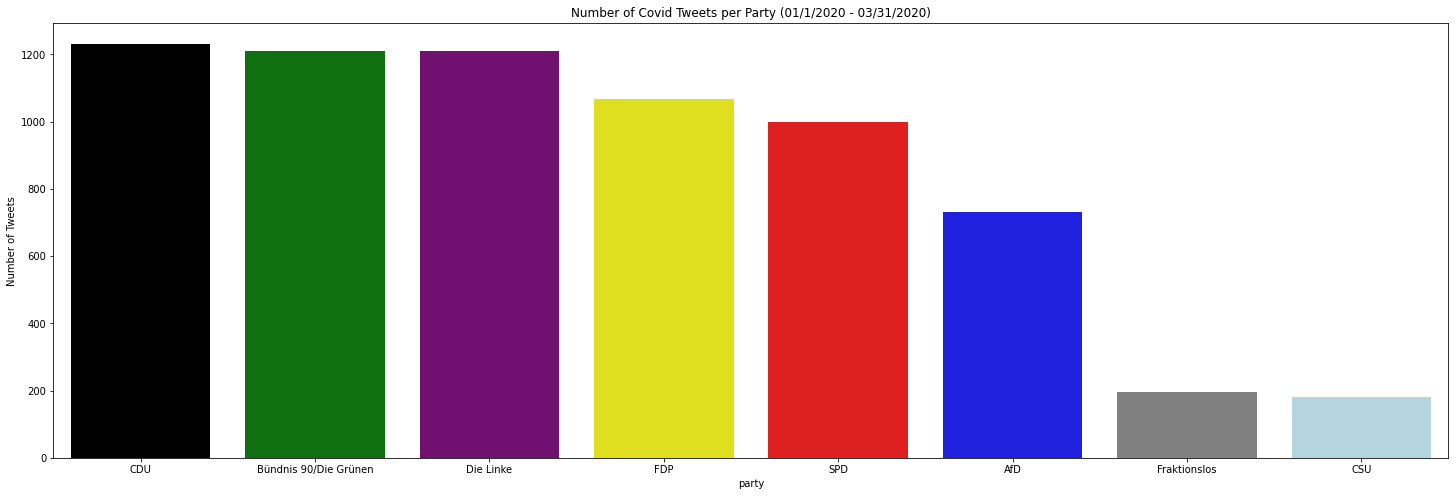

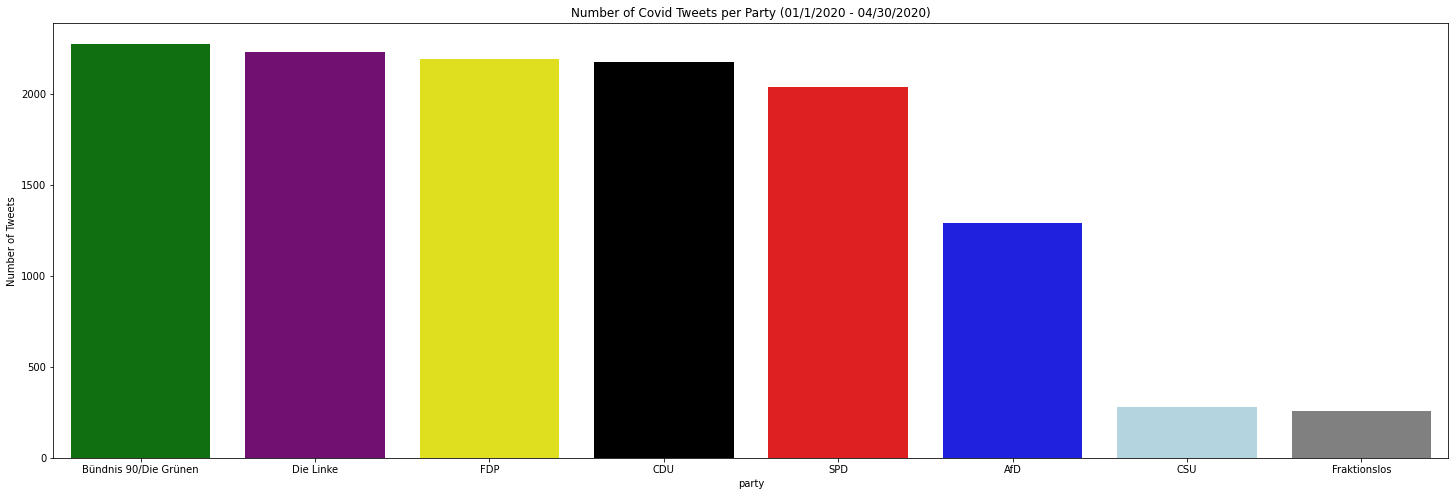

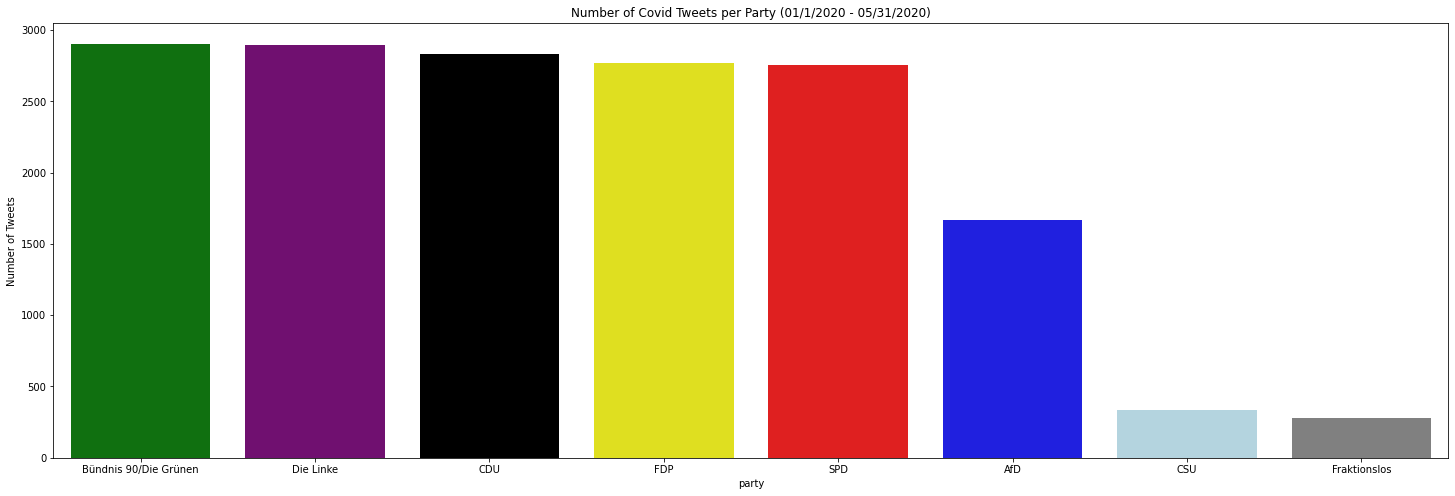

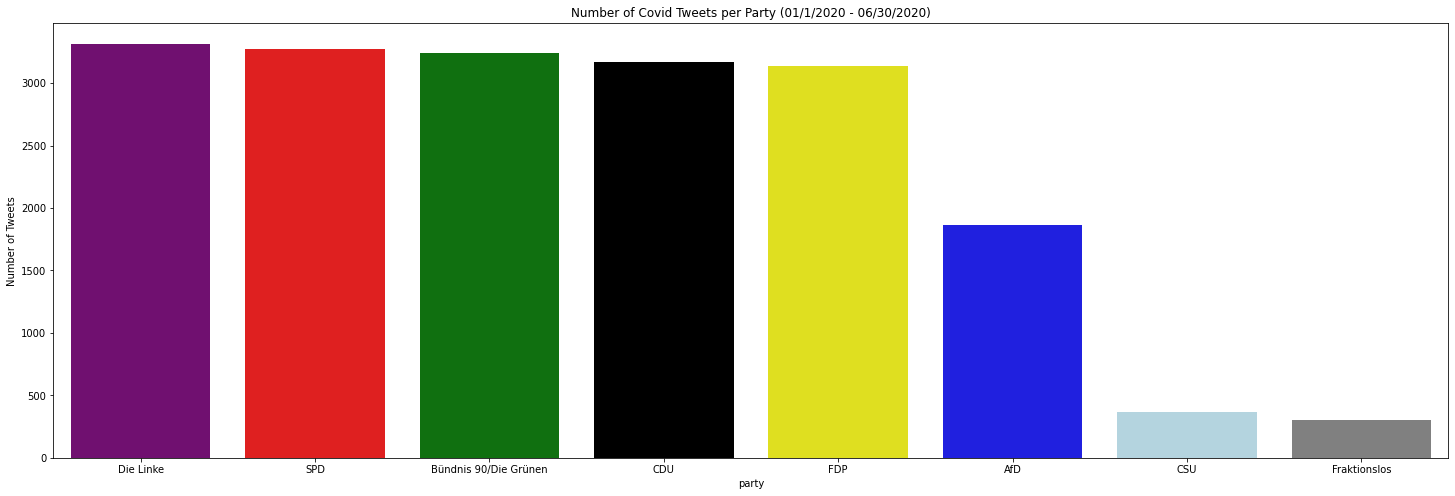

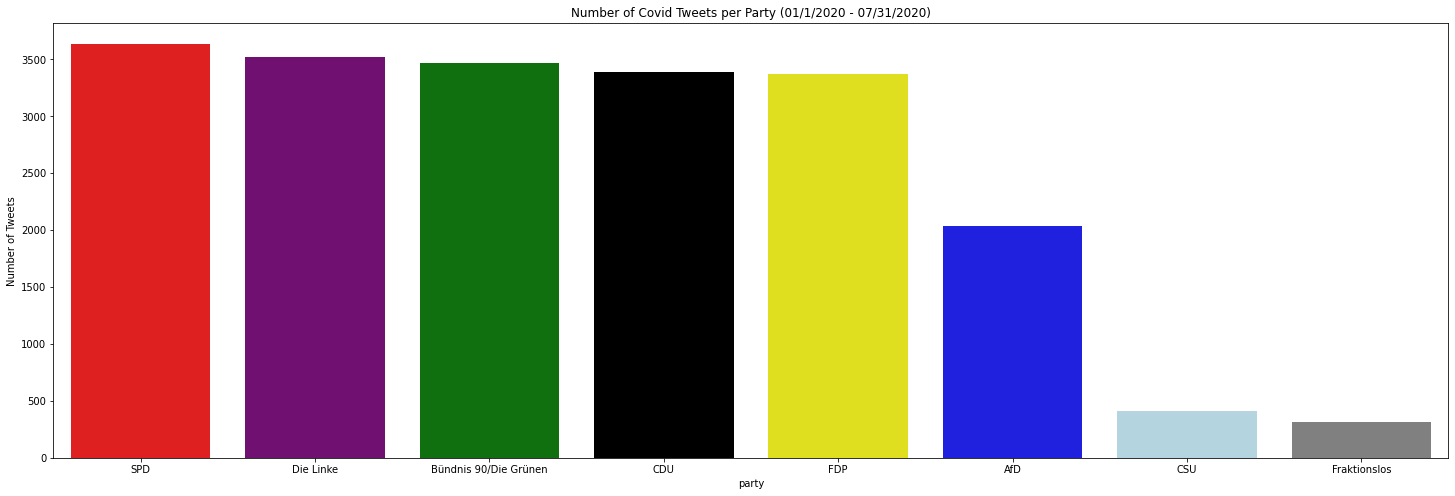

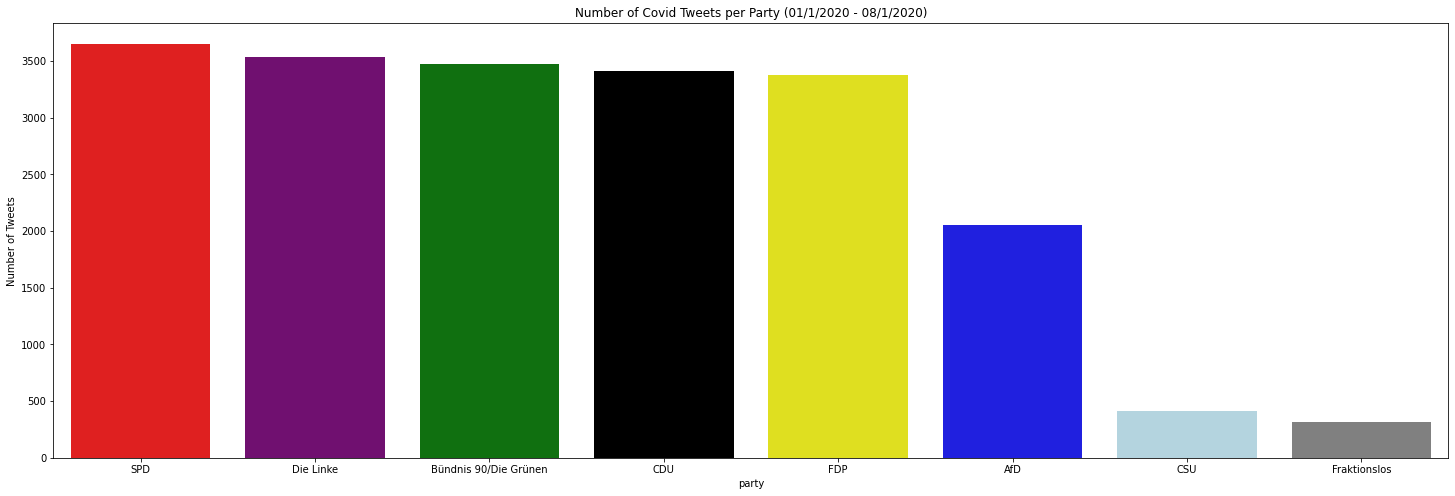

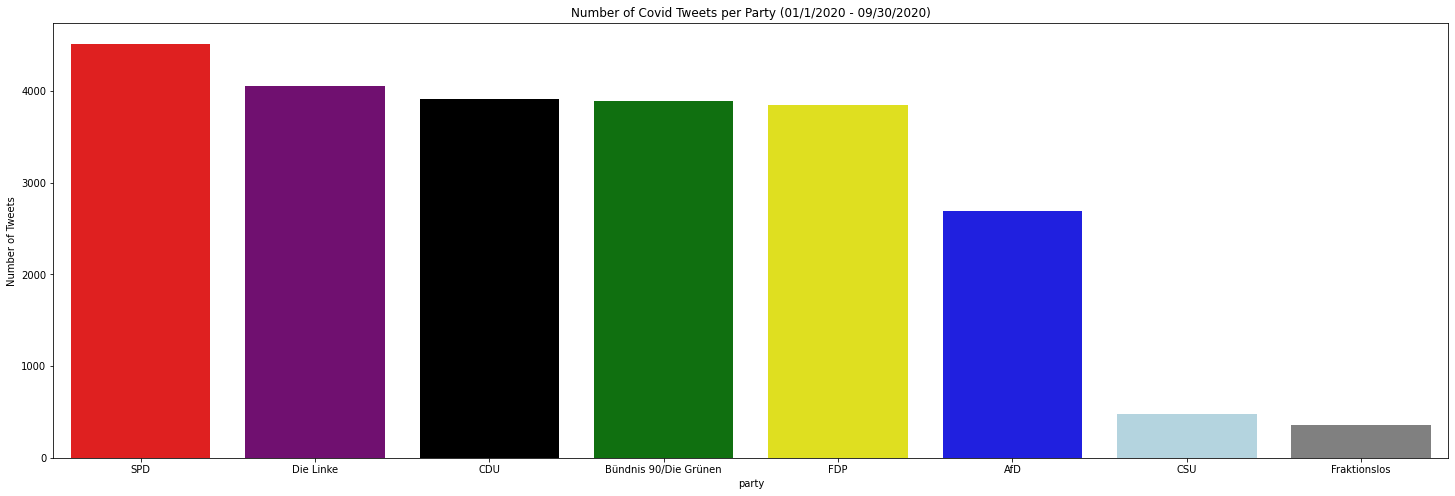

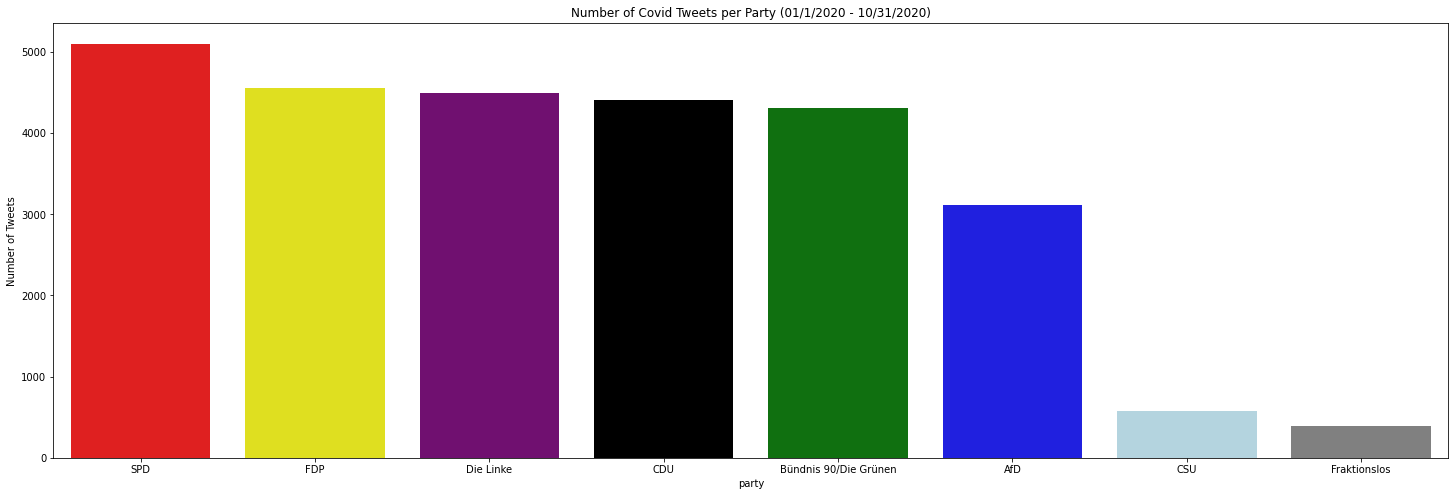

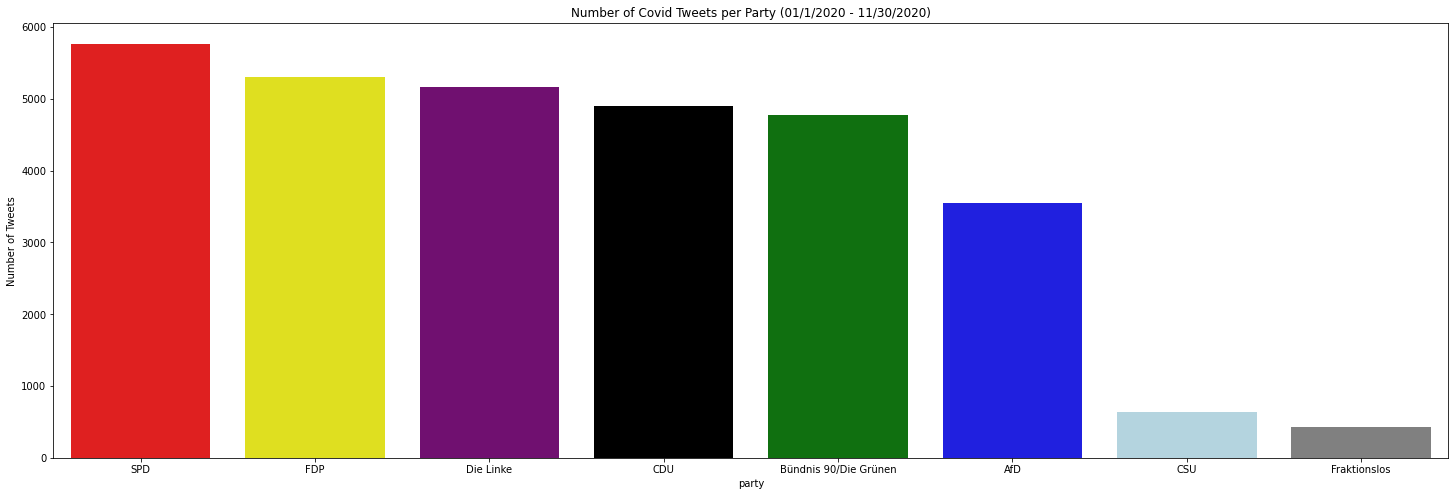

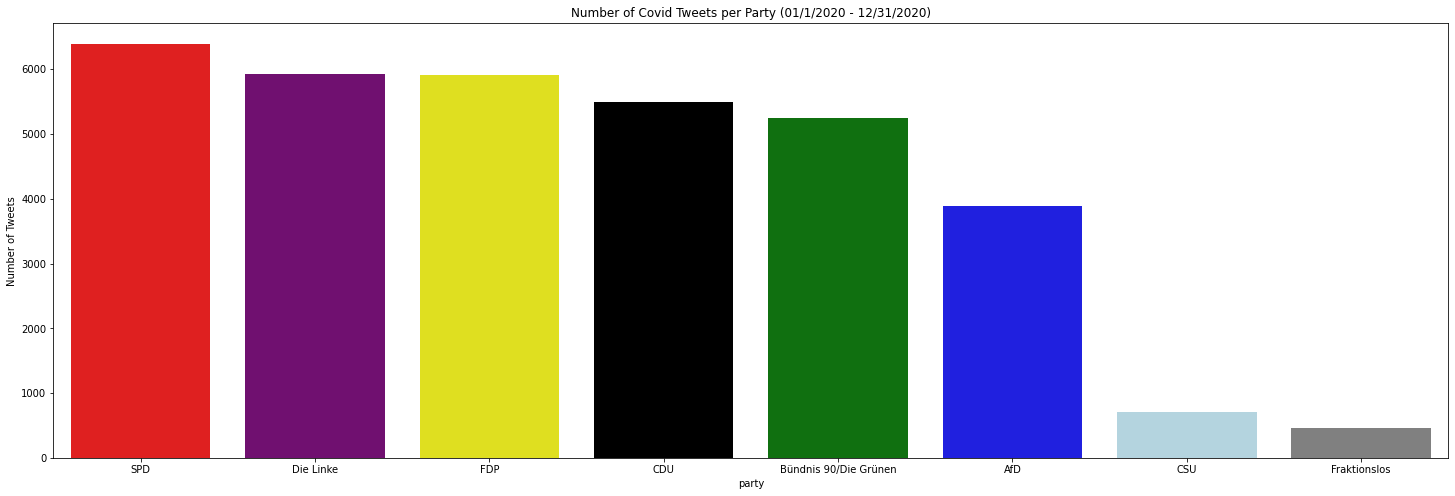

In [51]:
df_covid_tweets_per_month_cumulated = df_covid_tweets_stats.copy()
for key, value in year.items():
    df_tweets_per_month_cumulated = df_covid_tweets_per_month_cumulated.loc[(df_covid_tweets_per_month_cumulated['created at'] >= start_date) & (df_covid_tweets_per_month_cumulated['created at'] <= pd.to_datetime(value, utc= True))]
    df_tweets_per_month_cumulated.reset_index(inplace=True)
    fig = plt.subplots(figsize=(25,8))
    chart = sns.countplot(data=df_tweets_per_month_cumulated,
                          x='party',
                          order=df_tweets_per_month_cumulated['party'].value_counts().index,
                          palette=party_colors)
    chart.set(ylabel='Number of Tweets',
              title=f'Number of Covid Tweets per Party (01/1/2020 - {value})')
    plt.show()

# Number of Covid-Tweets per Party per Month

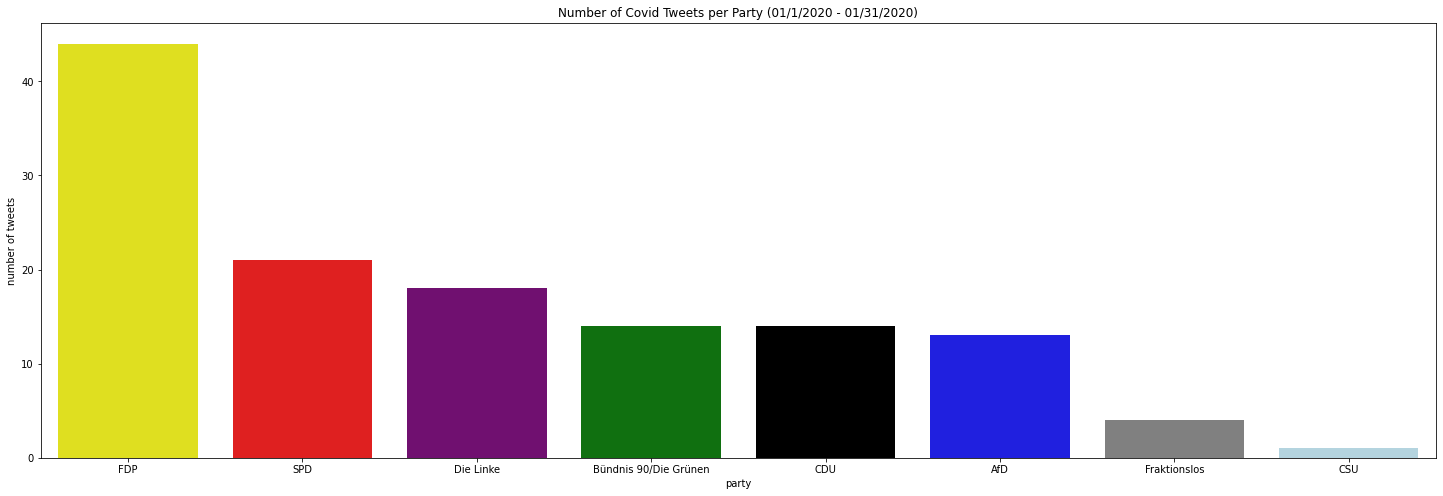

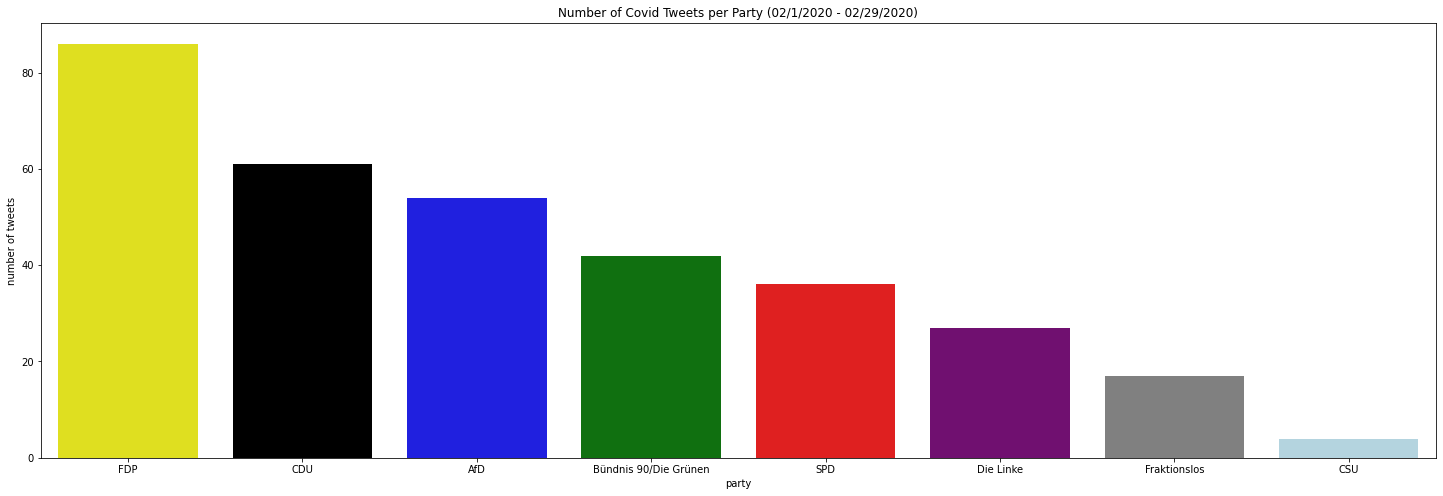

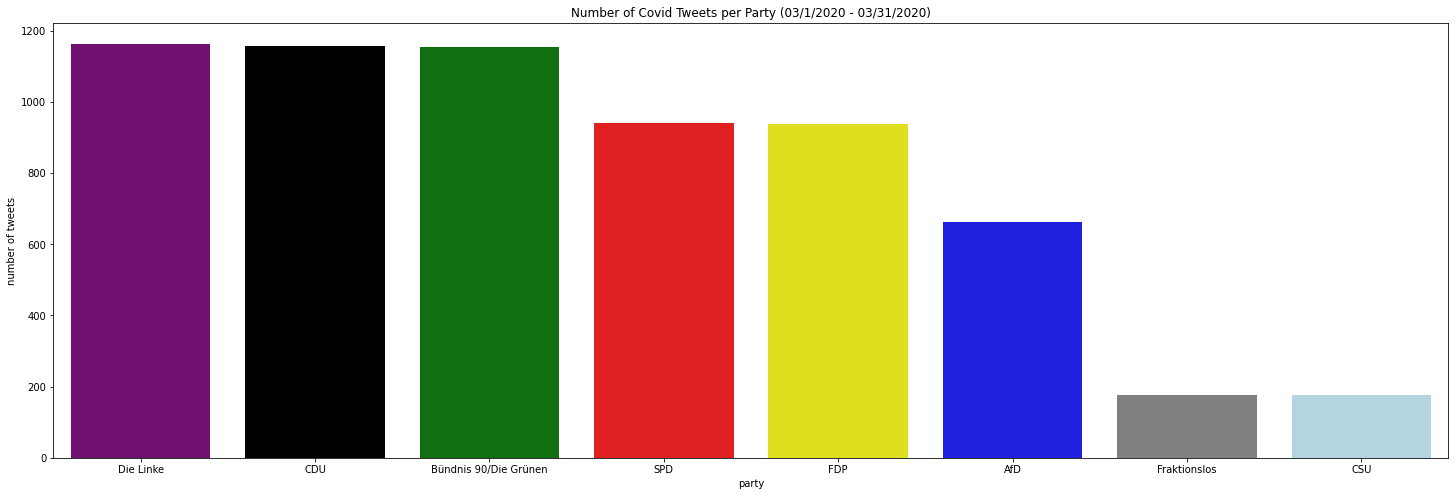

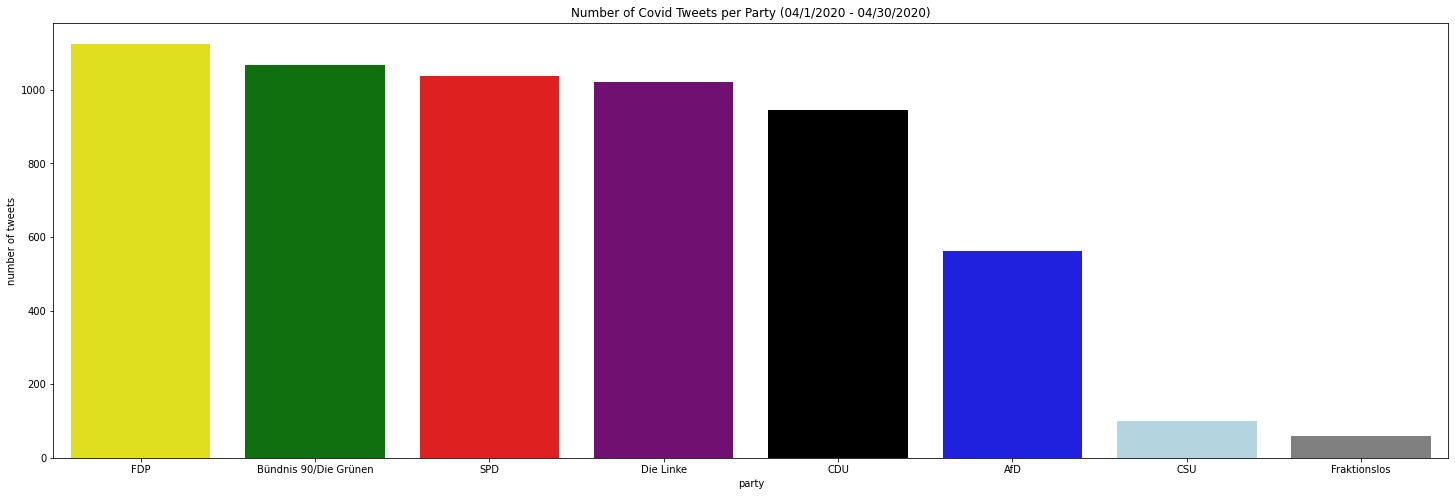

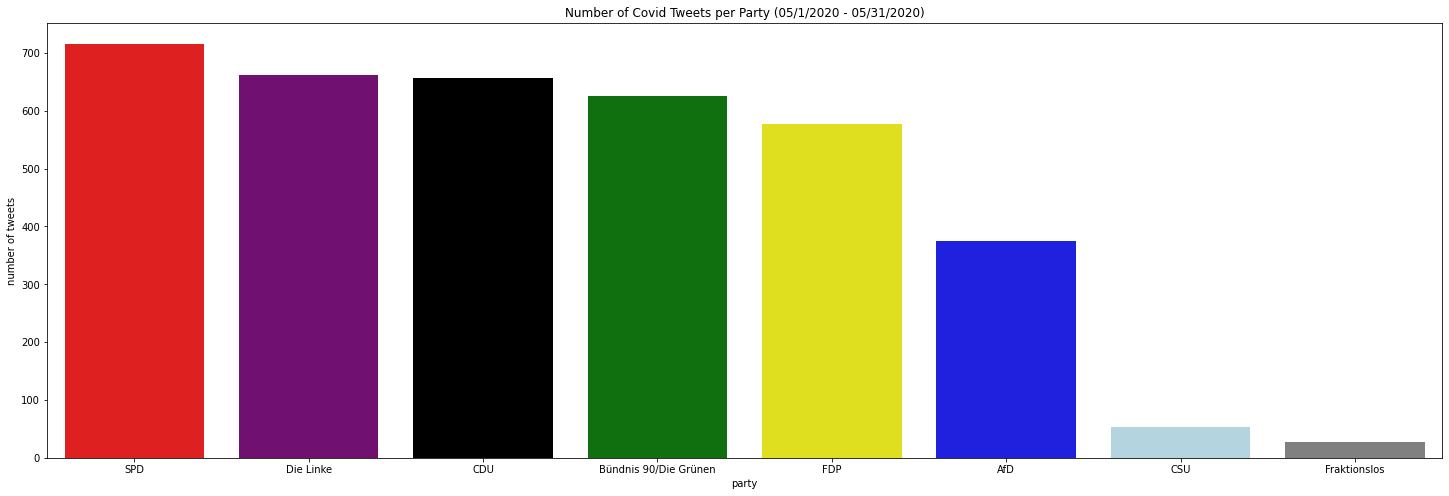

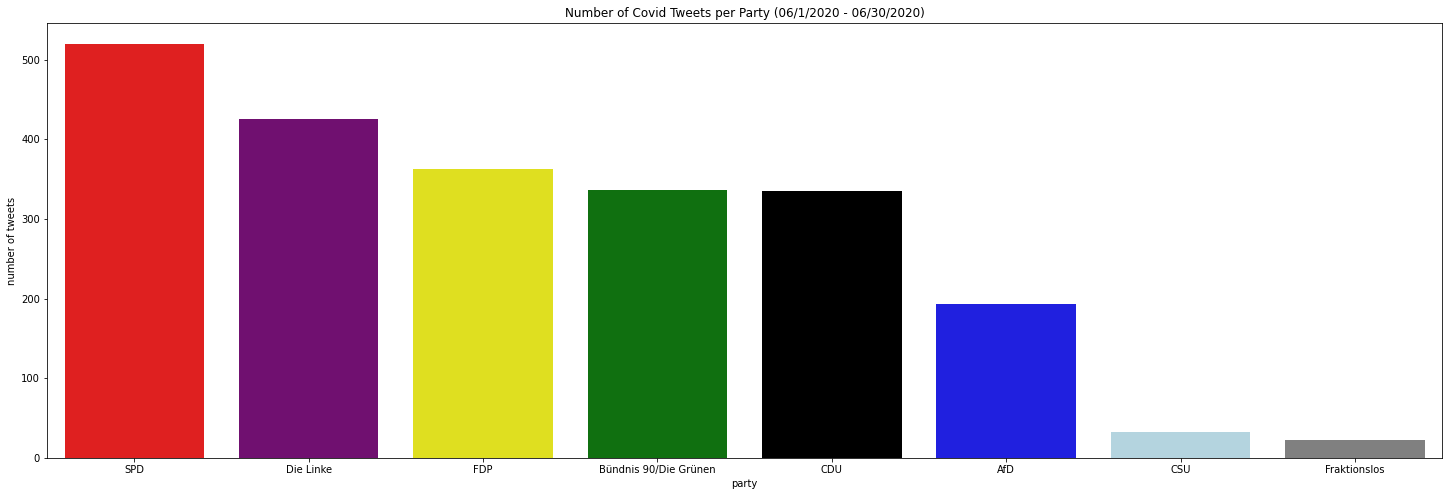

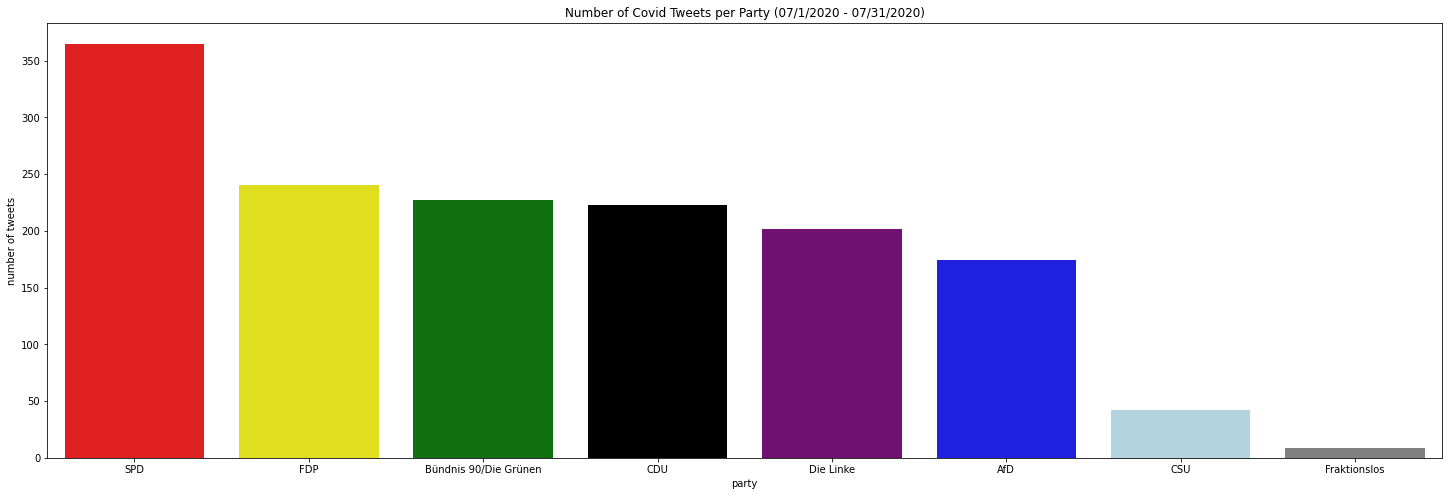

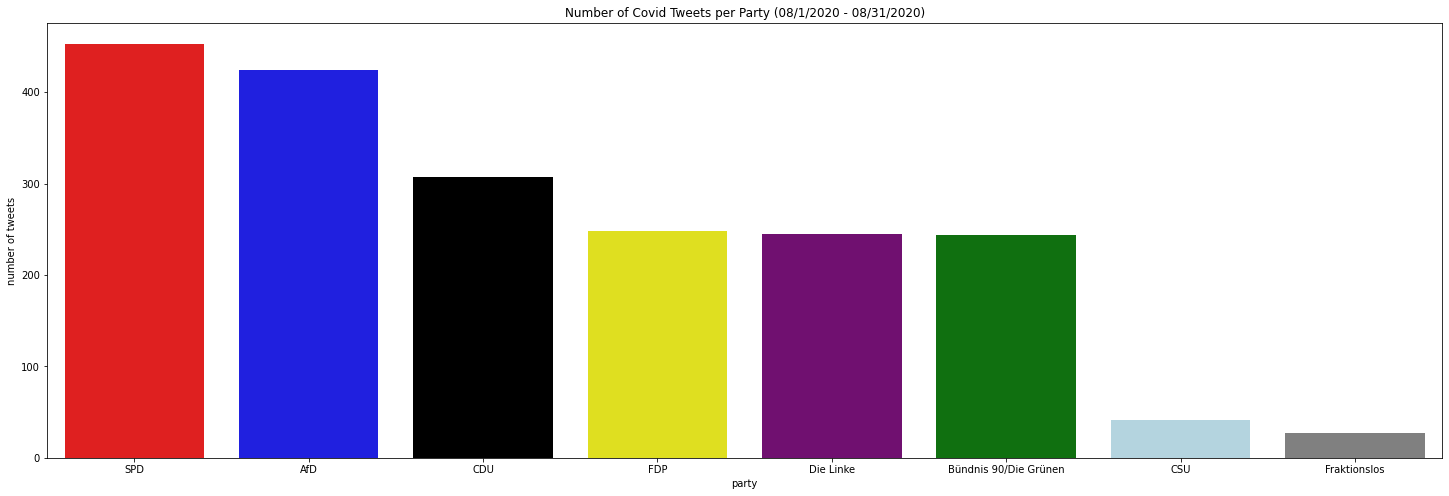

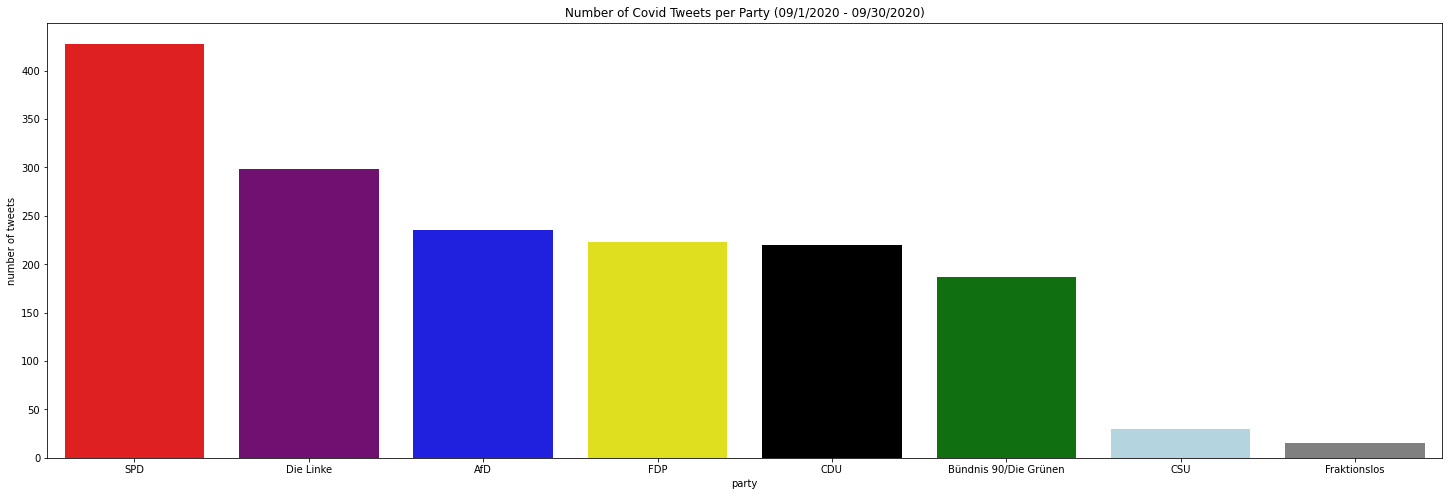

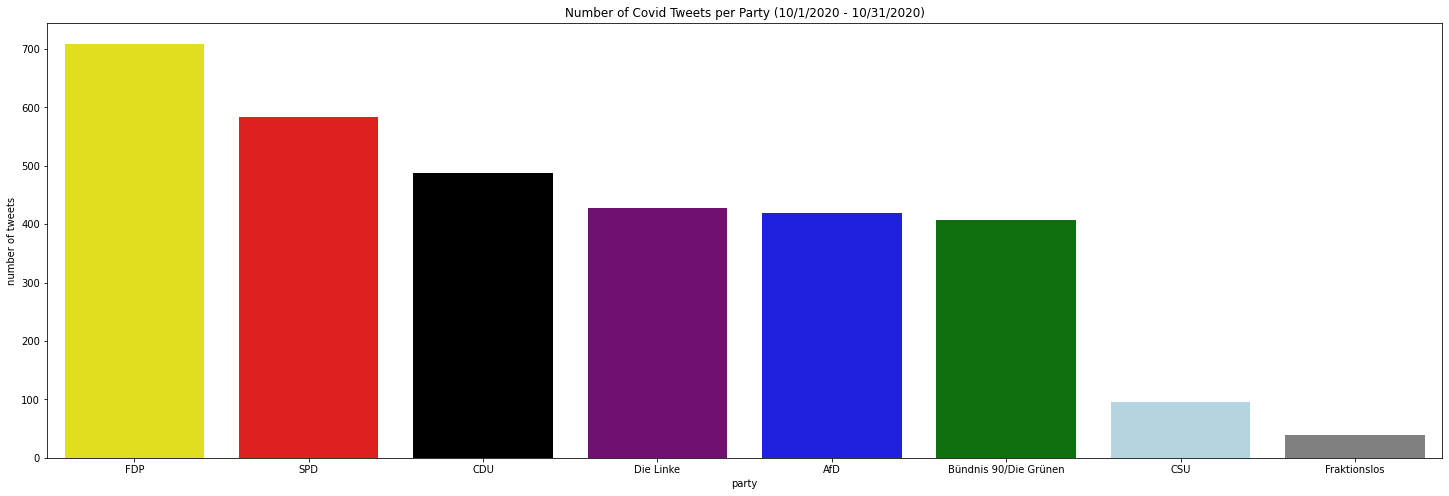

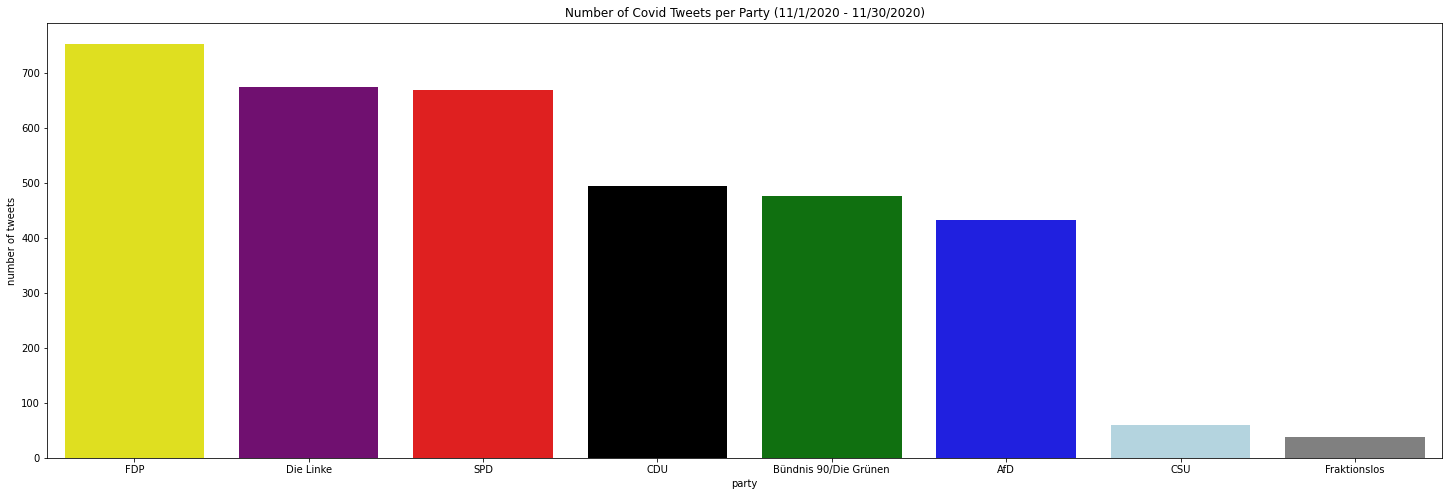

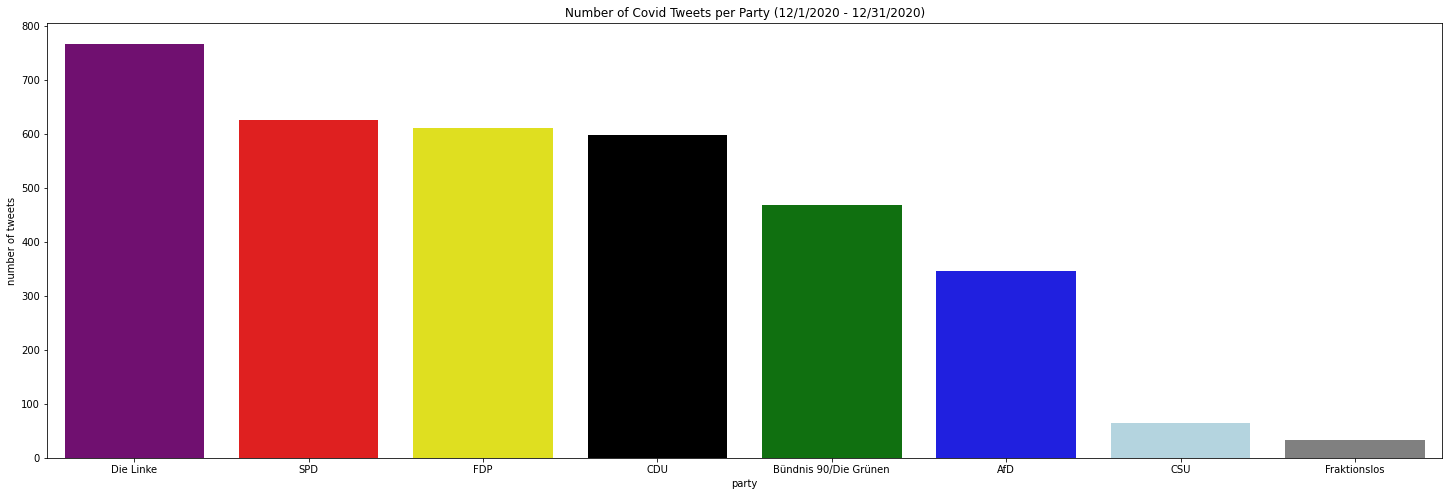

In [52]:
df_covid_tweets_per_month = df_covid_tweets_stats.copy()
for dates in start_end_date:
    df_tweets_stats_per_month = df_covid_tweets_per_month.loc[(df_covid_tweets_per_month['created at'] >= pd.to_datetime(dates[0], utc= True)) & (df_covid_tweets_per_month['created at'] <= pd.to_datetime(dates[1], utc= True))]
    df_tweets_stats_per_month.reset_index(inplace=True)
    fig = plt.subplots(figsize=(25,8))
    chart = sns.countplot(data=df_tweets_stats_per_month,
                          x='party',
                          order=df_tweets_stats_per_month['party'].value_counts().index,
                          palette=party_colors)
    chart.set(ylabel='number of tweets',
              title=f'Number of Covid Tweets per Party ({dates[0]} - {dates[1]})')
    plt.show()


# Number of Covid-Tweets throughout the Year

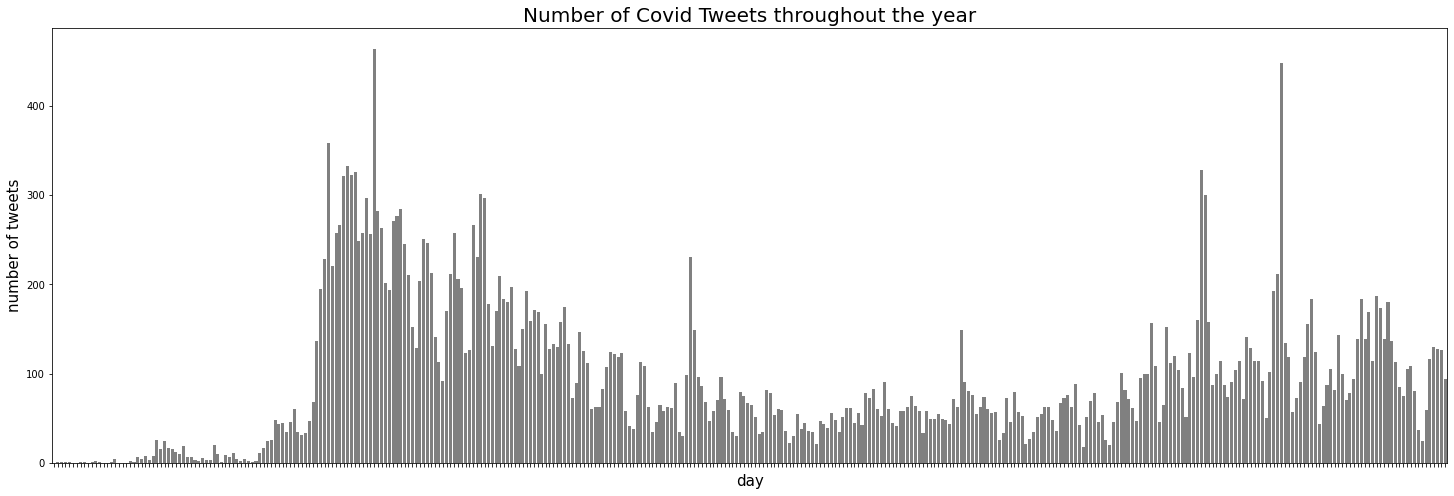

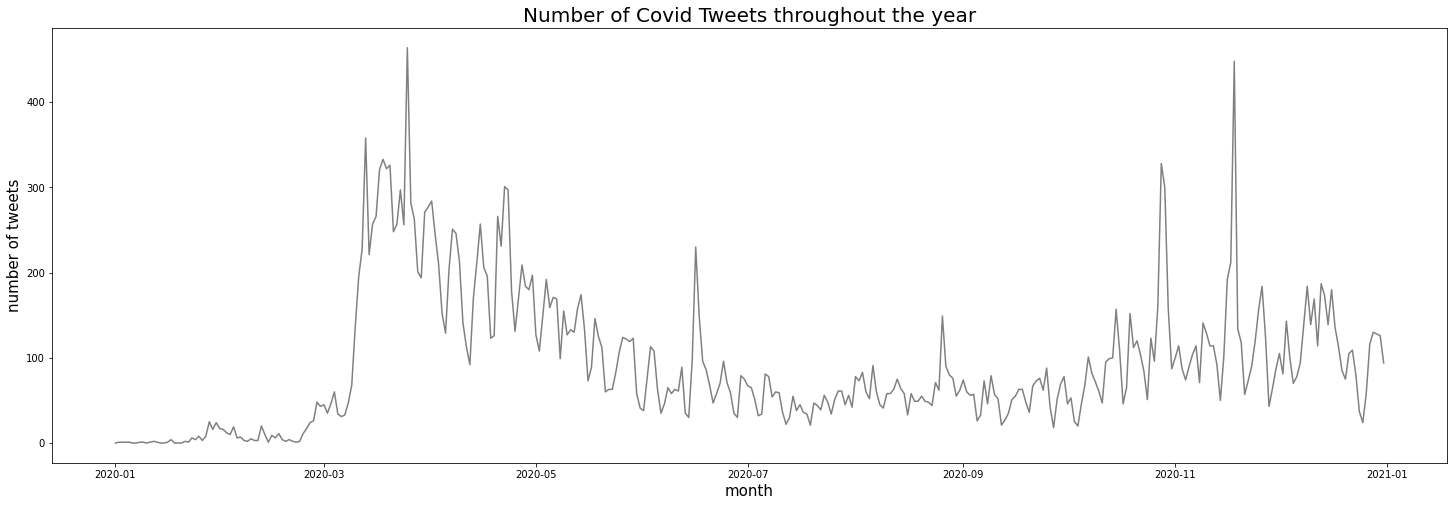

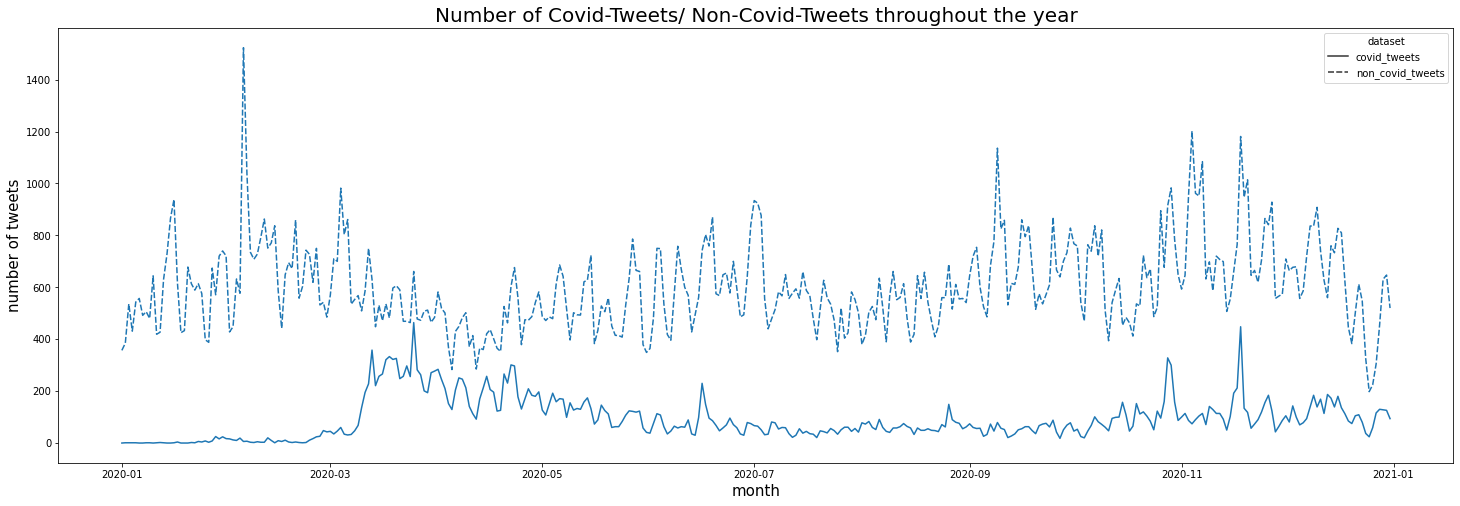

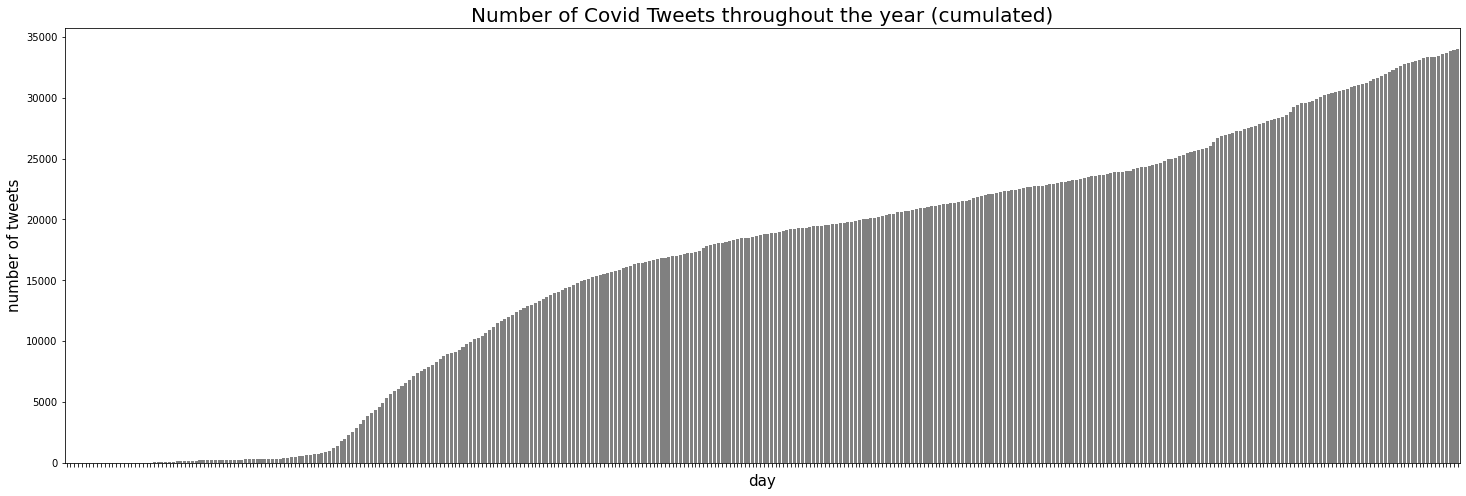

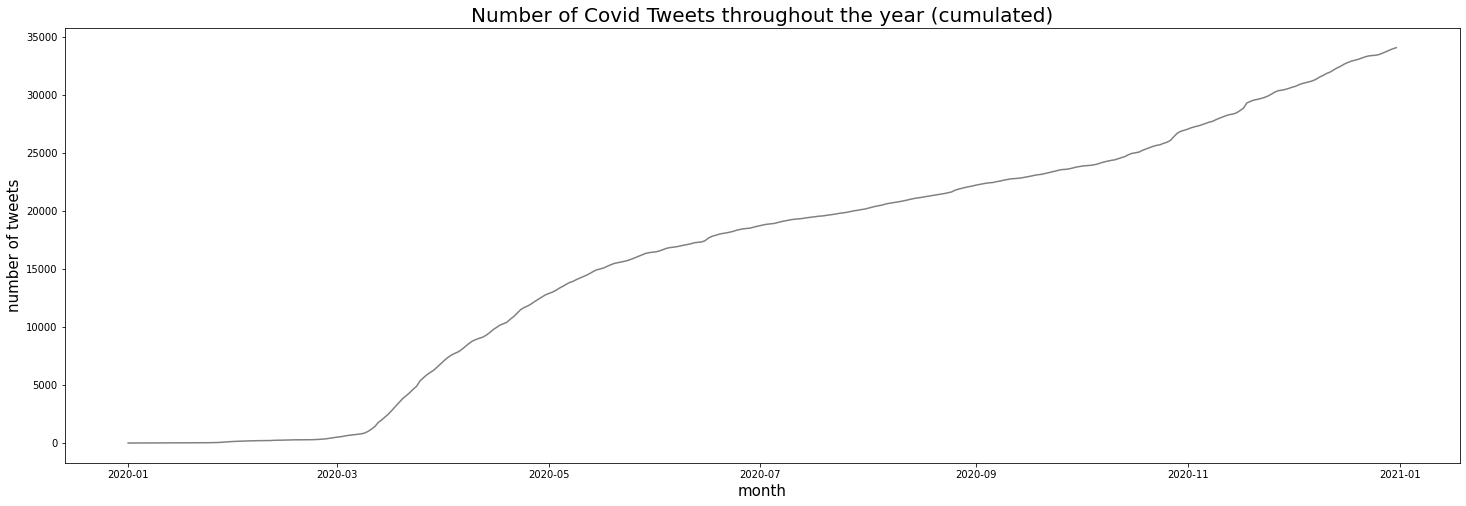

In [53]:
df_covid_tweets_year = df_covid_tweets_stats.copy()
df_covid_tweets_year = df_covid_tweets_year.loc[(df_covid_tweets_year['created at'] >= start_date) & (df_covid_tweets_year['created at'] <= end_date)]
df_covid_tweets_year = df_covid_tweets_year.pivot_table(index=['created at'], aggfunc='size')
df_covid_tweets_year = df_covid_tweets_year.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
df_covid_tweets_year = pd.DataFrame({'date':df_covid_tweets_year.index, 'tweets':df_covid_tweets_year.values})

df_non_covid_tweets_year = df_non_covid_tweets_stats.copy()
df_non_covid_tweets_year = df_non_covid_tweets_year.loc[(df_non_covid_tweets_year['created at'] >= start_date) & (df_non_covid_tweets_year['created at'] <= end_date)]
df_non_covid_tweets_year = df_non_covid_tweets_year.pivot_table(index=['created at'], aggfunc='size')
df_non_covid_tweets_year = df_non_covid_tweets_year.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
df_non_covid_tweets_year = pd.DataFrame({'date':df_non_covid_tweets_year.index, 'tweets':df_non_covid_tweets_year.values})
df_non_covid_tweets_year['date']=pd.to_datetime(df_non_covid_tweets_year['date'], utc= True).dt.date

df_tweets_stats_year_cumulated = df_covid_tweets_year.copy()
df_tweets_stats_year_cumulated['tweets']=df_tweets_stats_year_cumulated['tweets'].cumsum(axis = 0)

concatenated_year = pd.concat([df_covid_tweets_year.assign(dataset='covid_tweets'), df_non_covid_tweets_year.assign(dataset='non_covid_tweets')])

fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_year,
                    x='date',
                    y='tweets',
                    color='grey')
ax.set_xticklabels([])
chart.set_title("Number of Covid Tweets throughout the year", fontsize = 20)
chart.set_xlabel("day", fontsize = 15)
chart.set_ylabel("number of tweets", fontsize = 15)
plt.show()

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=df_covid_tweets_year,
                     color='grey')
plt.title("Number of Covid Tweets throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=concatenated_year,
                     style='dataset')
plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_tweets_stats_year_cumulated,
                    x='date',
                    y='tweets',
                    color='grey')
ax.set_xticklabels([])
chart.set_title("Number of Covid Tweets throughout the year (cumulated)", fontsize = 20)
chart.set_xlabel("day", fontsize = 15)
chart.set_ylabel("number of tweets", fontsize = 15)
plt.show()


plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date', y='tweets',
                     data=df_tweets_stats_year_cumulated,
                     color='grey')
plt.title("Number of Covid Tweets throughout the year (cumulated)", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

# Number of Covid Tweets per Party throughout the Year

name          object
party         object
created at    object
dtype: object
       index              name party  created at
0          0   Altmaier, Peter   CDU  2020-03-21
1          1   Altmaier, Peter   CDU  2020-03-29
2          2   Altmaier, Peter   CDU  2020-04-02
3          3   Altmaier, Peter   CDU  2020-04-12
4          4   Altmaier, Peter   CDU  2020-04-20
...      ...               ...   ...         ...
33206  33207  Polenz, Ruprecht   CDU  2020-10-30
33207  33208  Polenz, Ruprecht   CDU  2020-11-08
33208  33209  Polenz, Ruprecht   CDU  2020-12-14
33209  33210  Polenz, Ruprecht   CDU  2020-12-15
33210  33211  Polenz, Ruprecht   CDU  2020-12-23

[5499 rows x 4 columns]
       index           name party  created at
23        23   Annen, Niels   SPD  2020-03-07
24        24   Annen, Niels   SPD  2020-03-13
25        25   Annen, Niels   SPD  2020-03-15
26        26   Annen, Niels   SPD  2020-03-15
27        27   Annen, Niels   SPD  2020-03-15
...      ...            ...   ... 

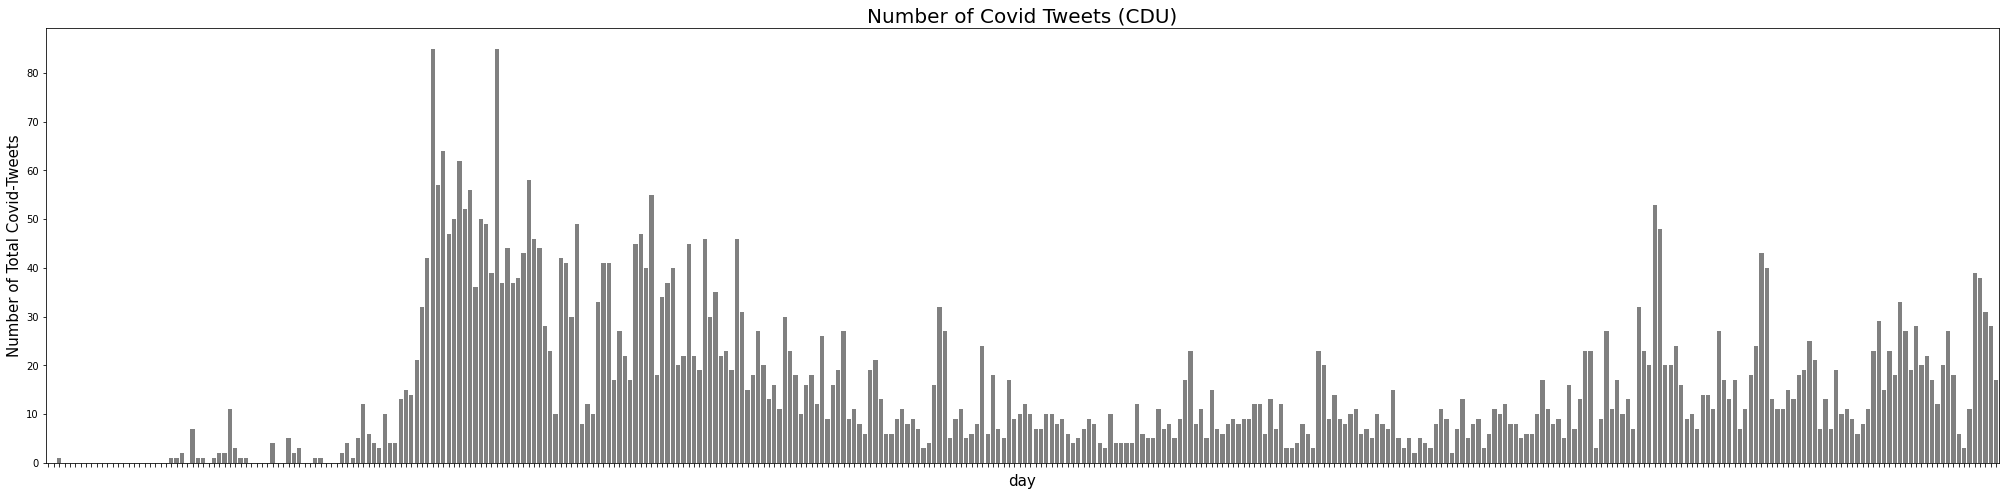

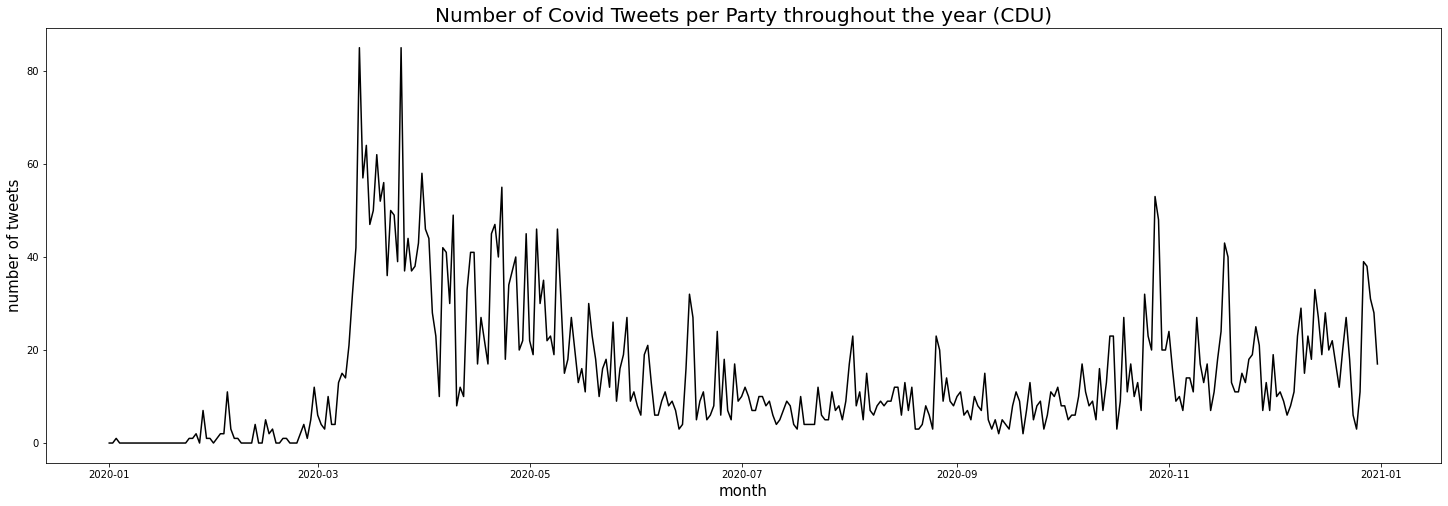

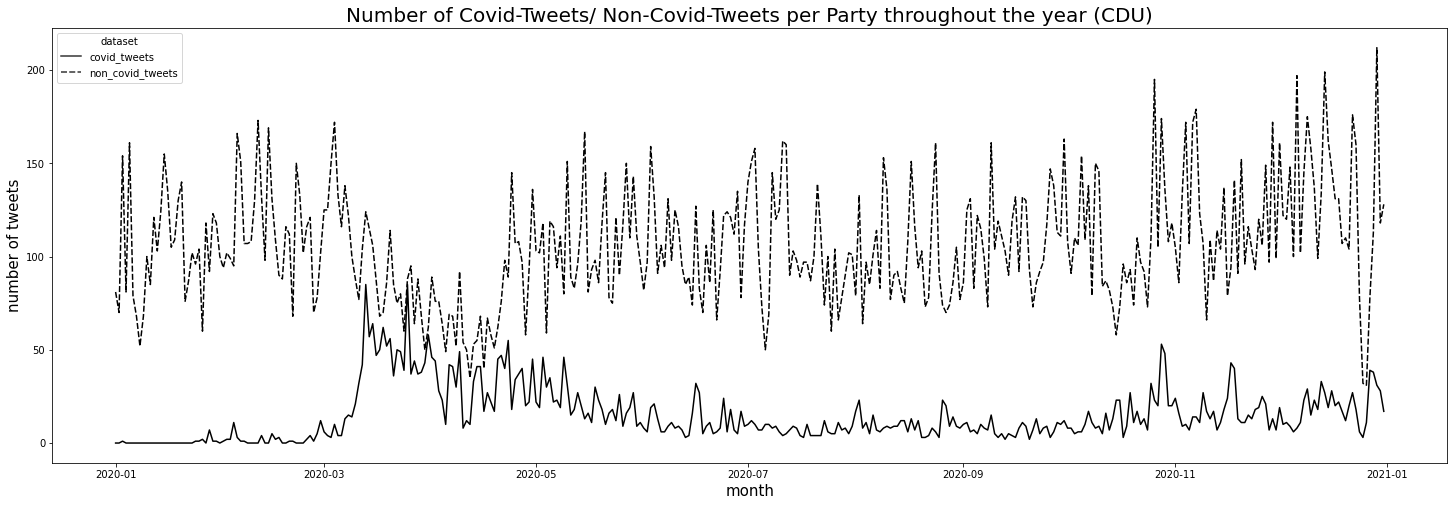

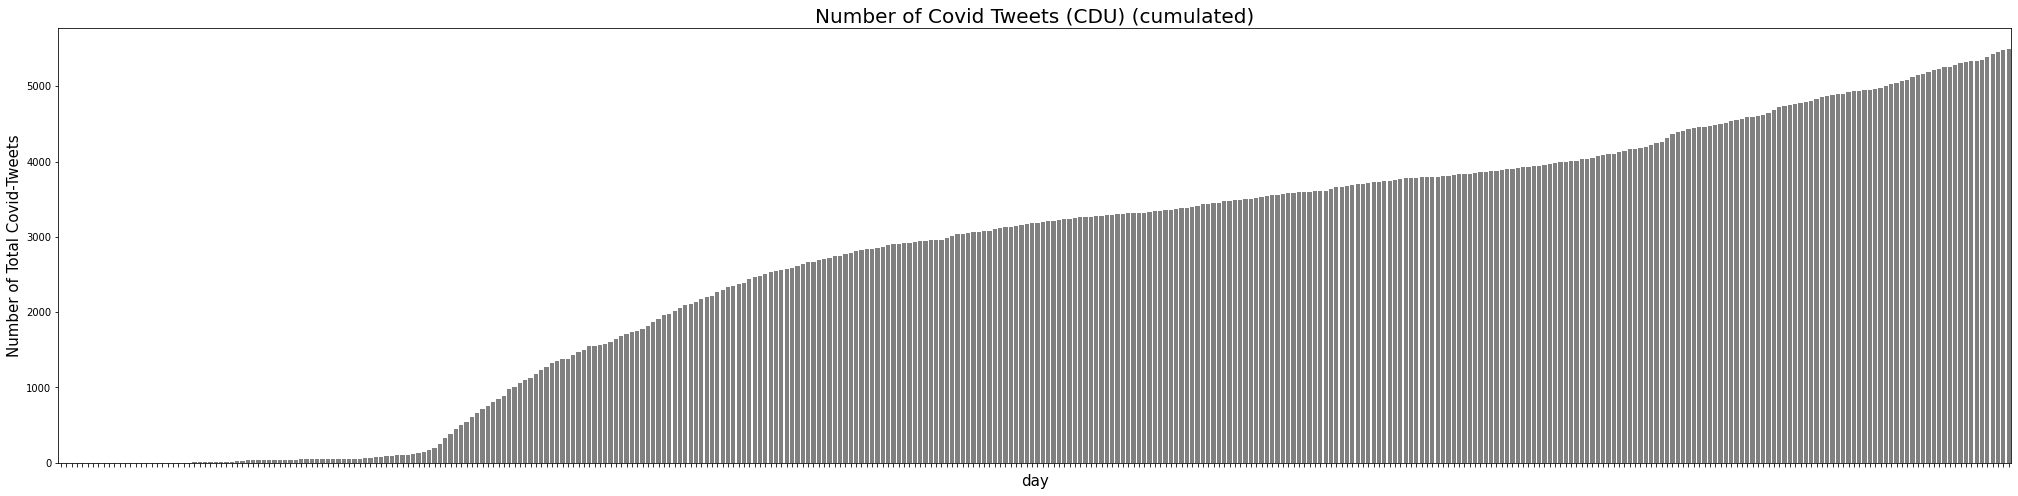

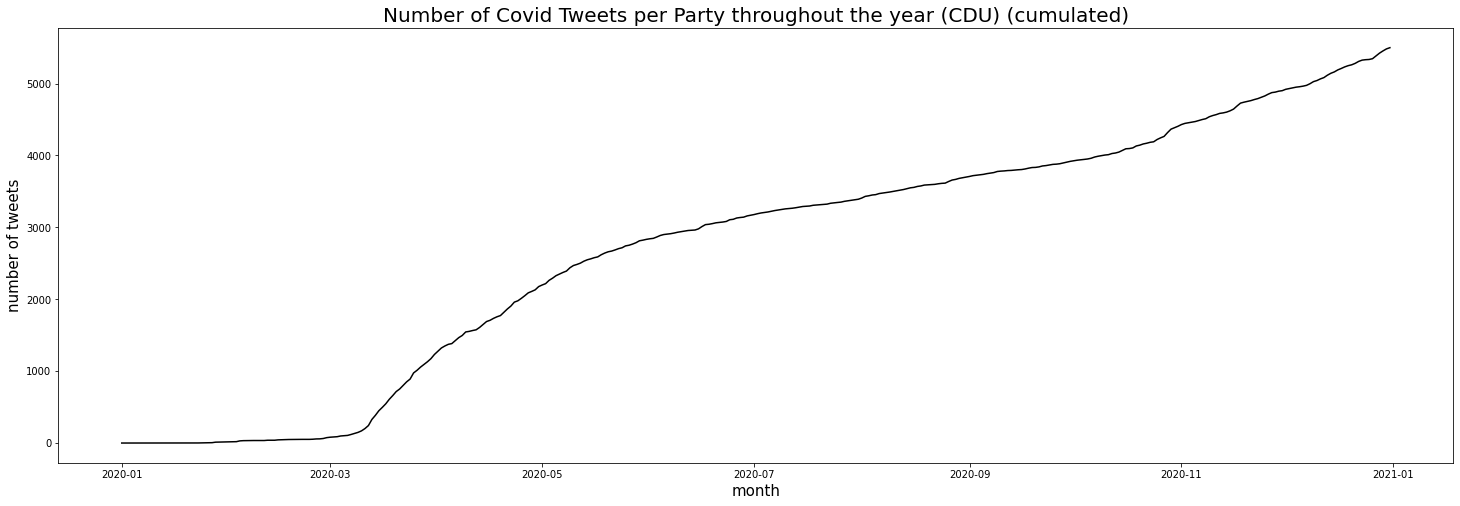

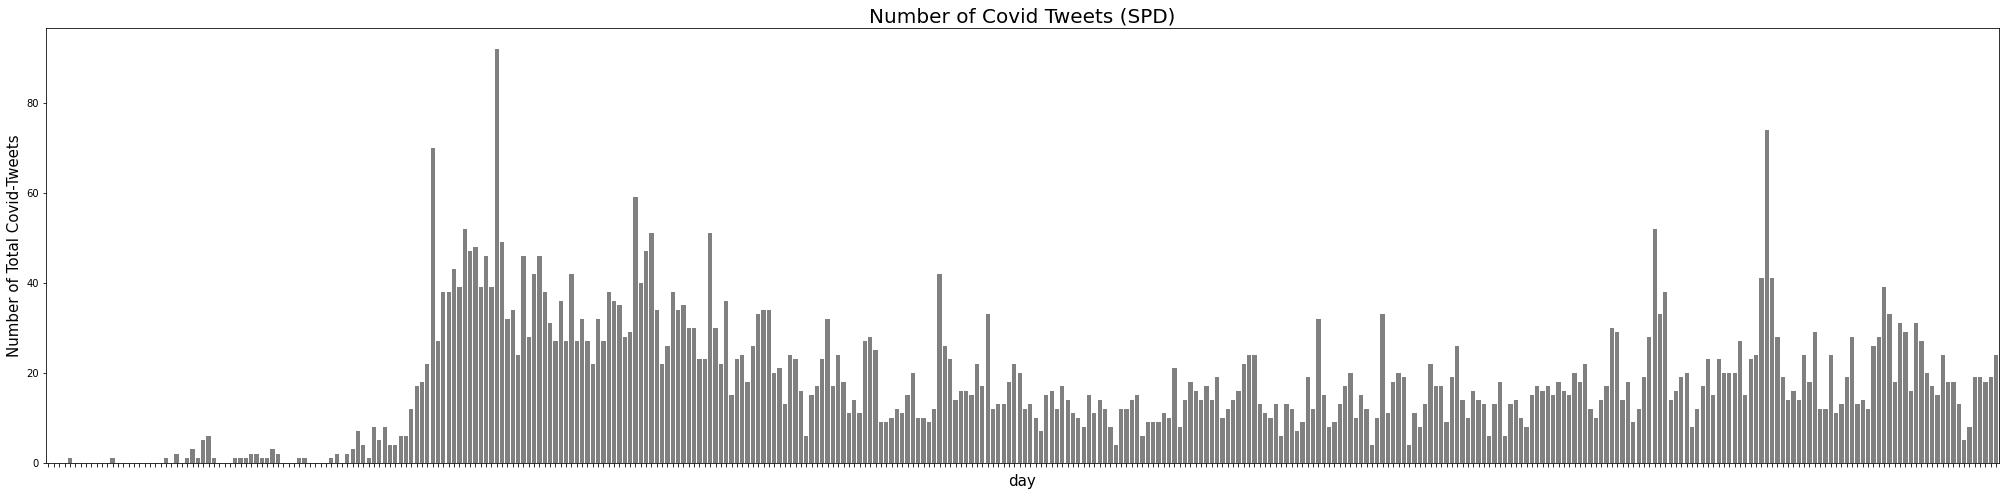

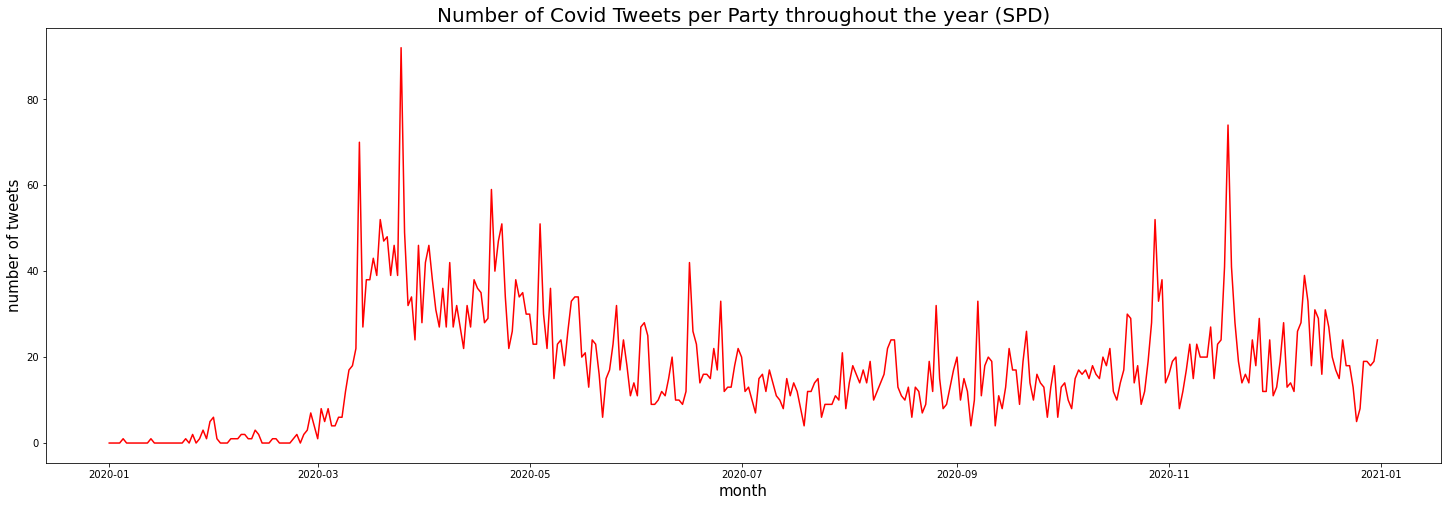

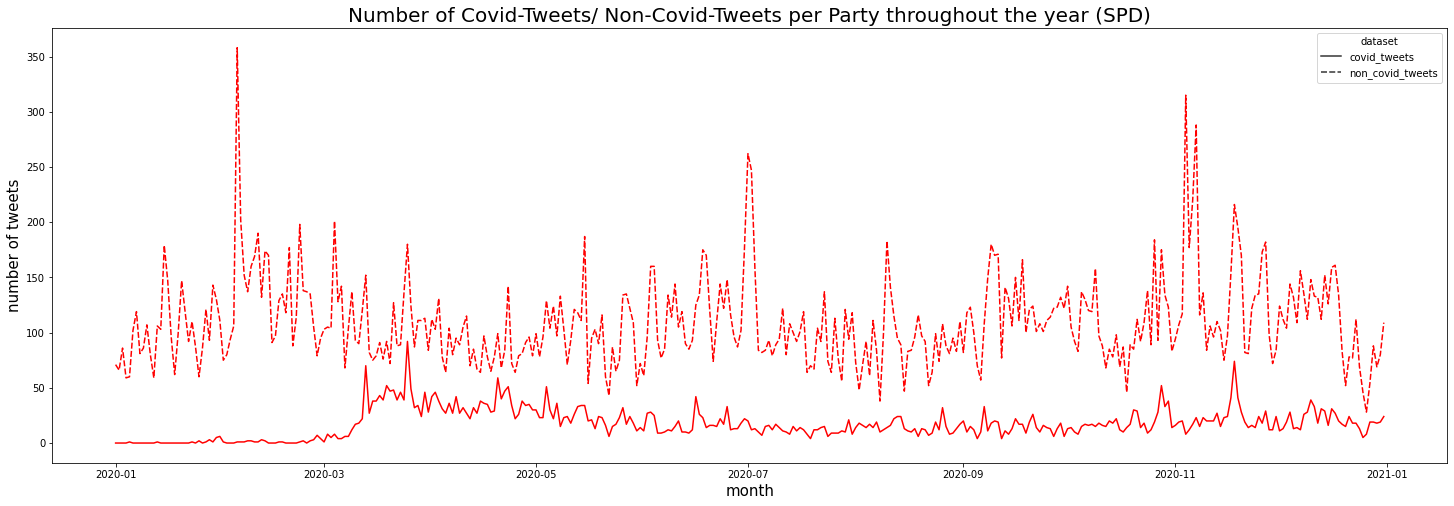

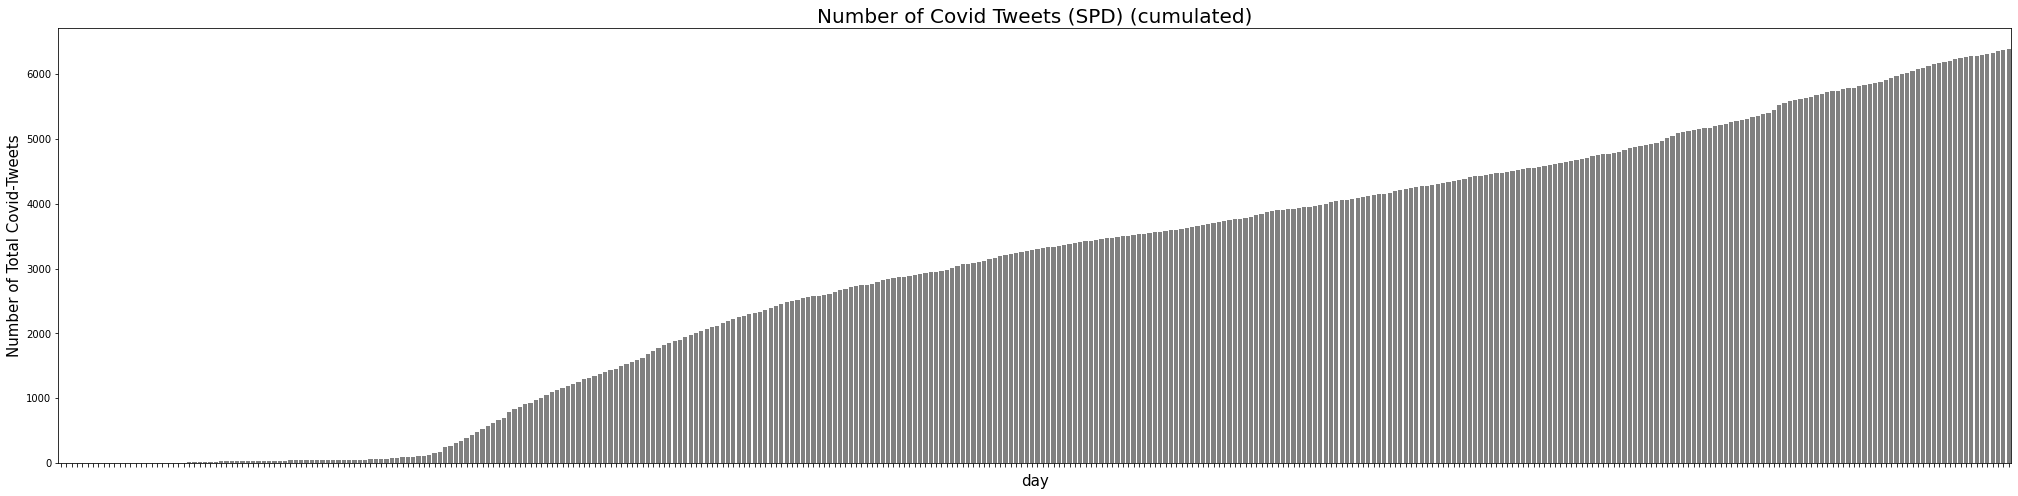

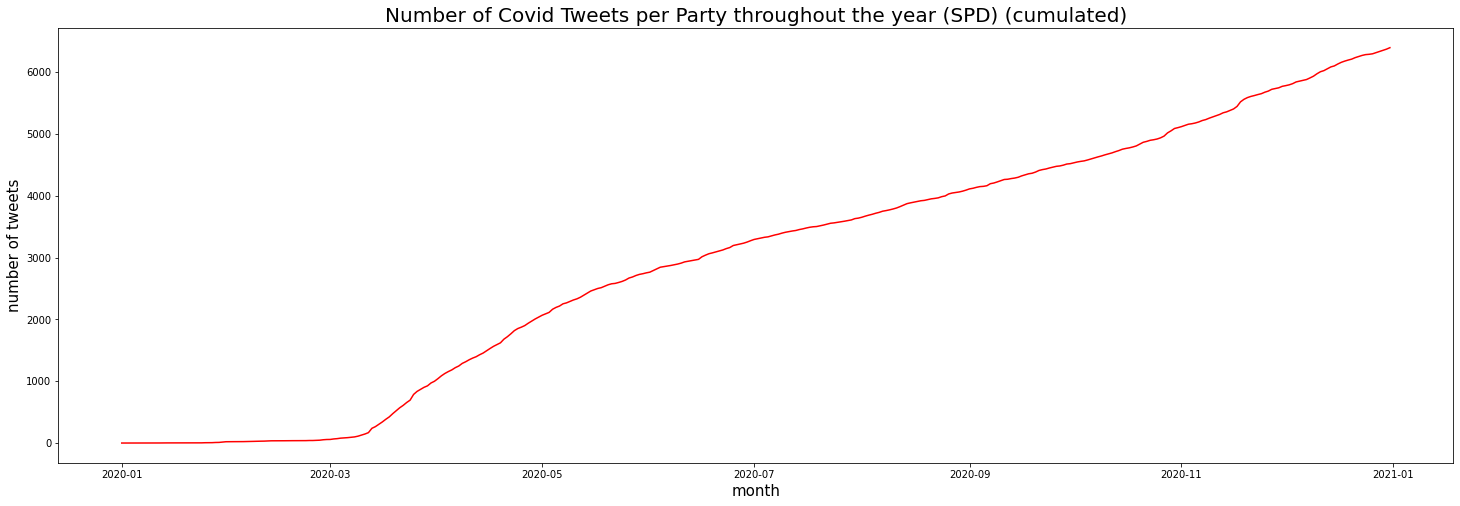

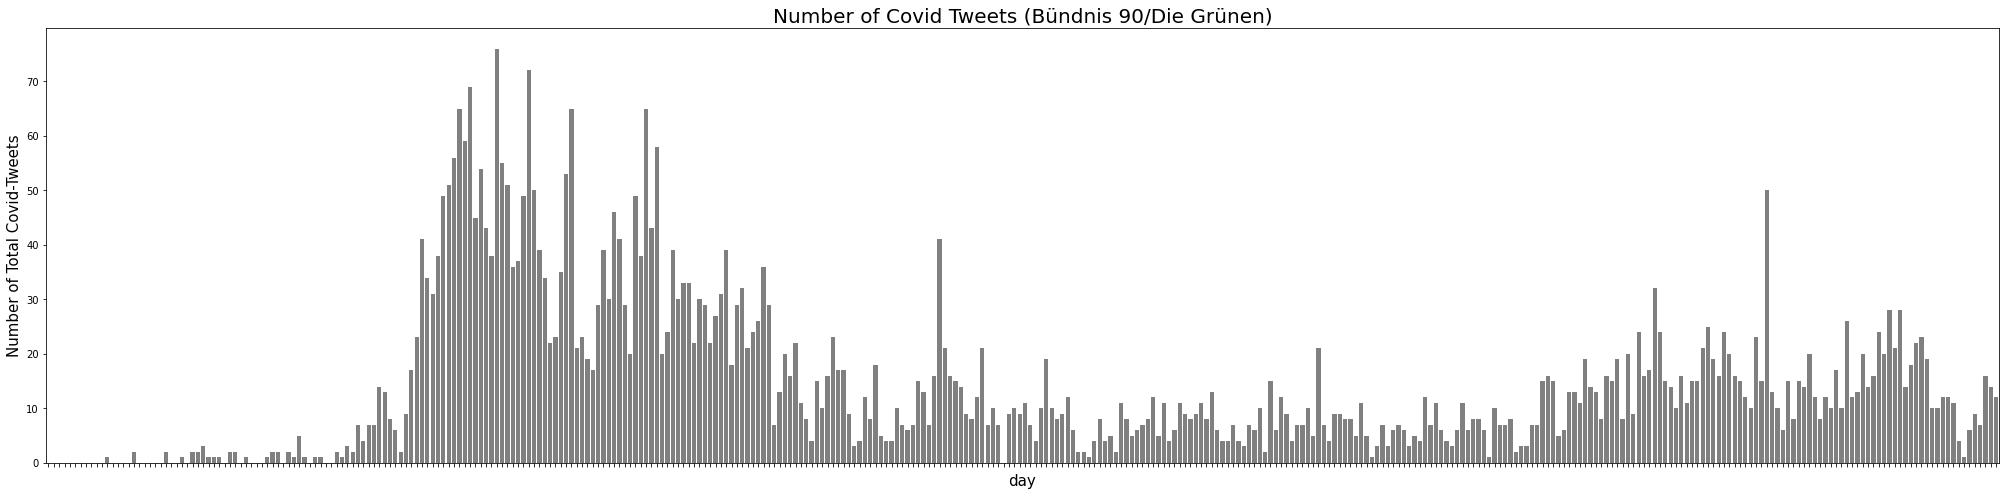

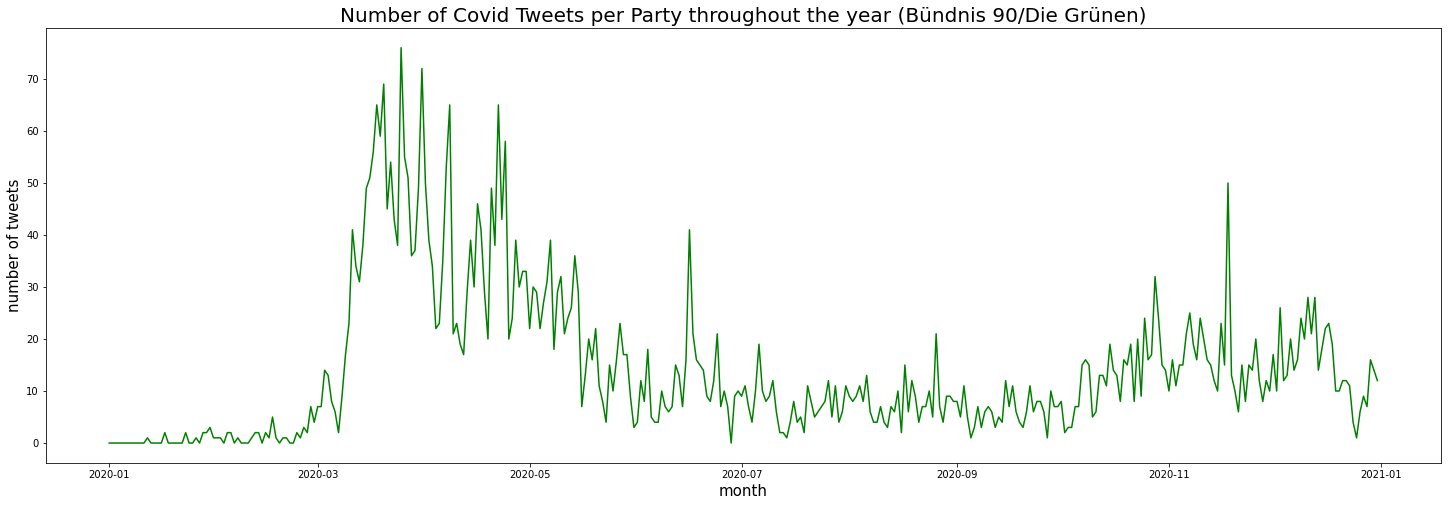

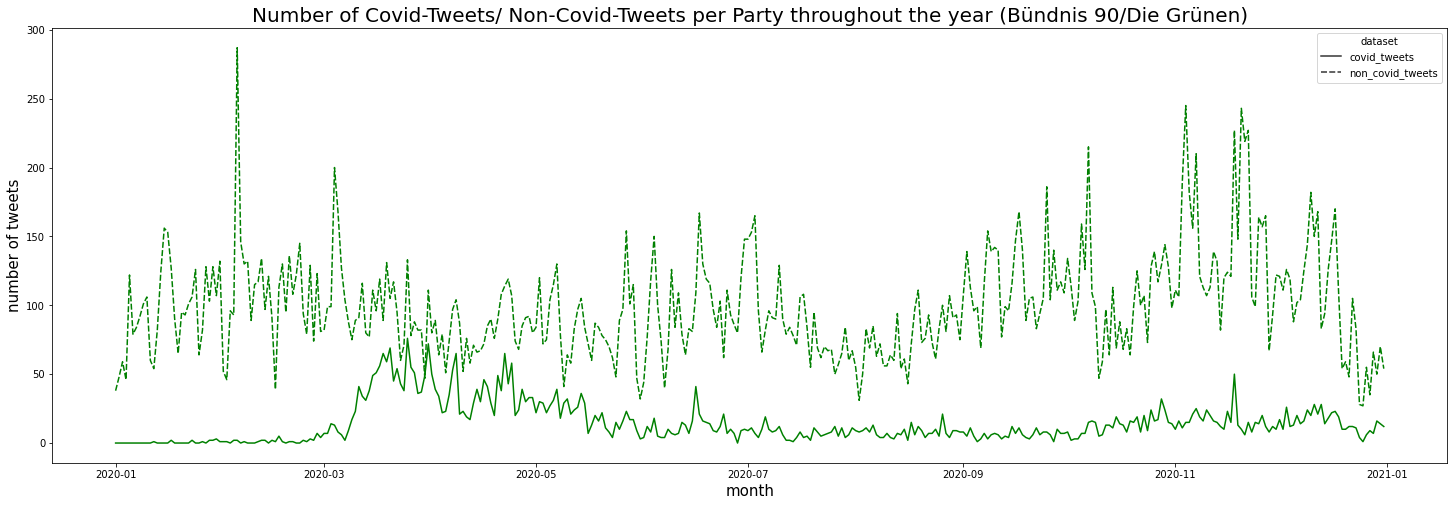

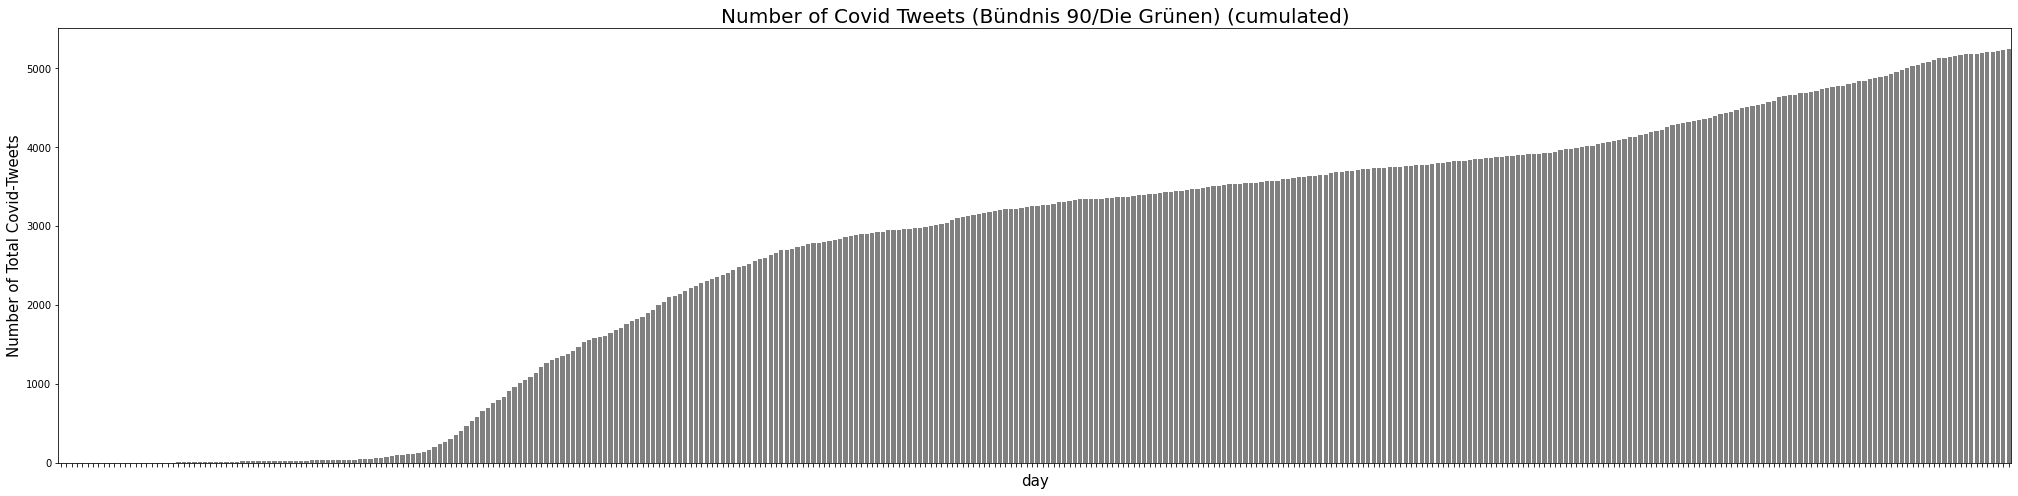

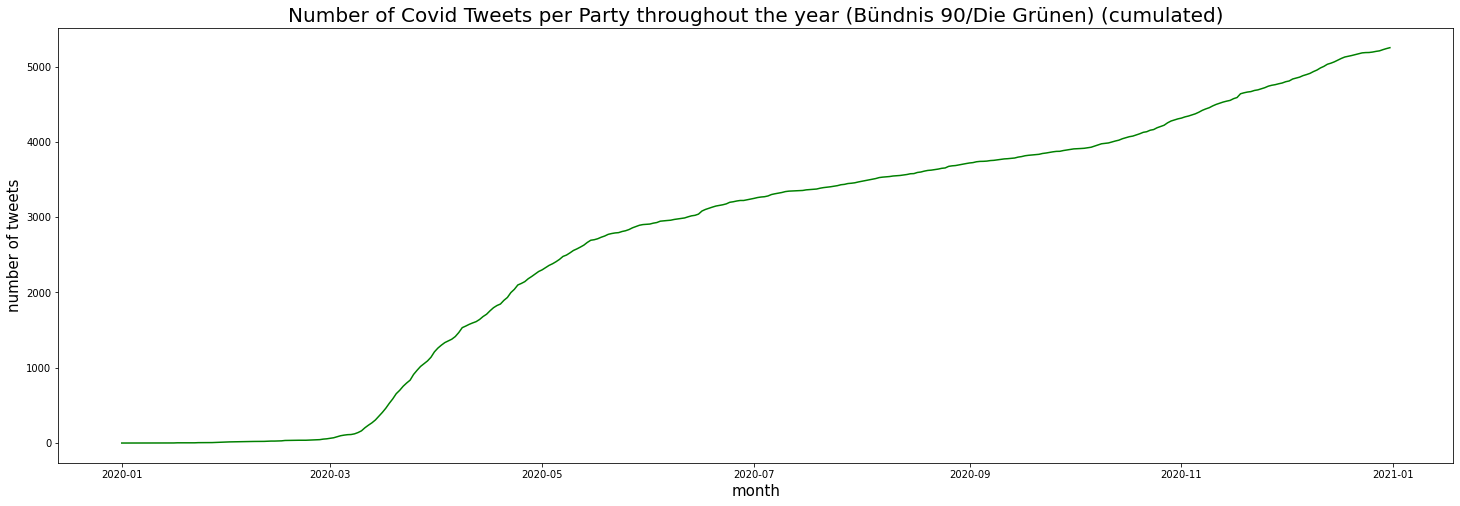

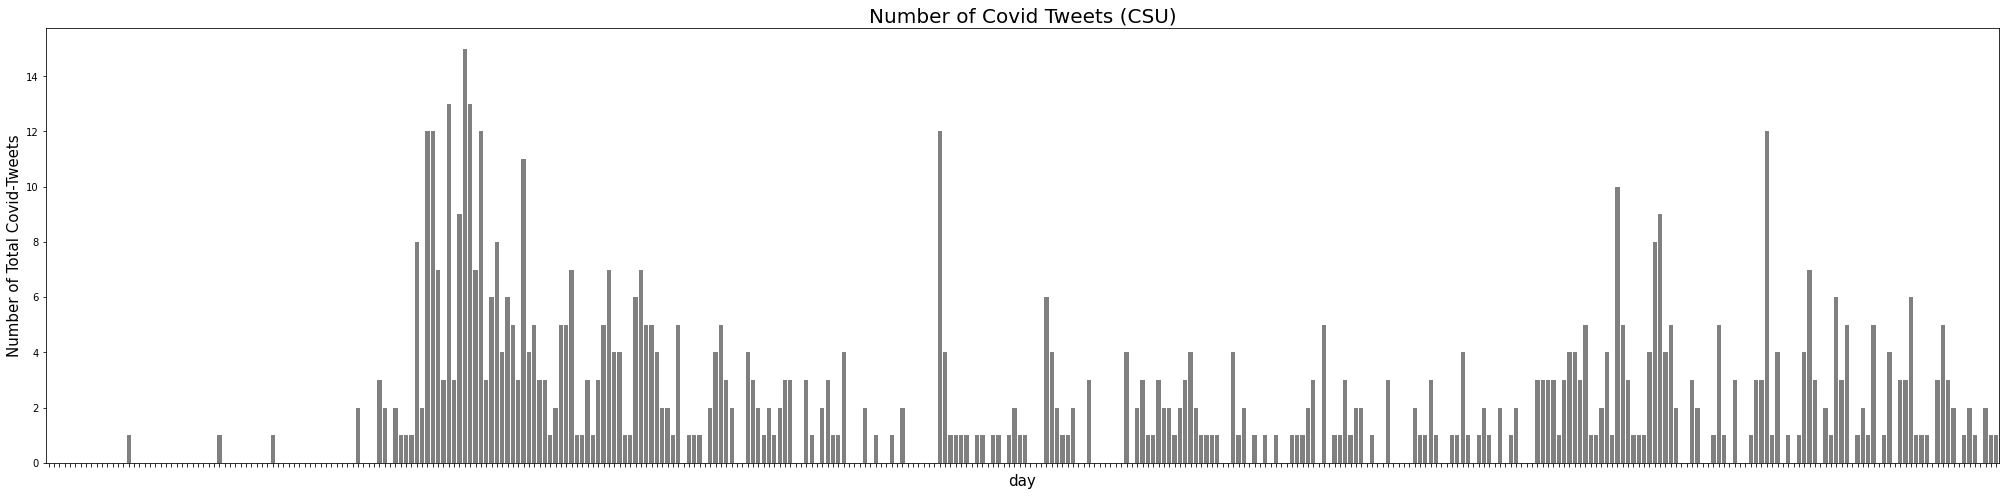

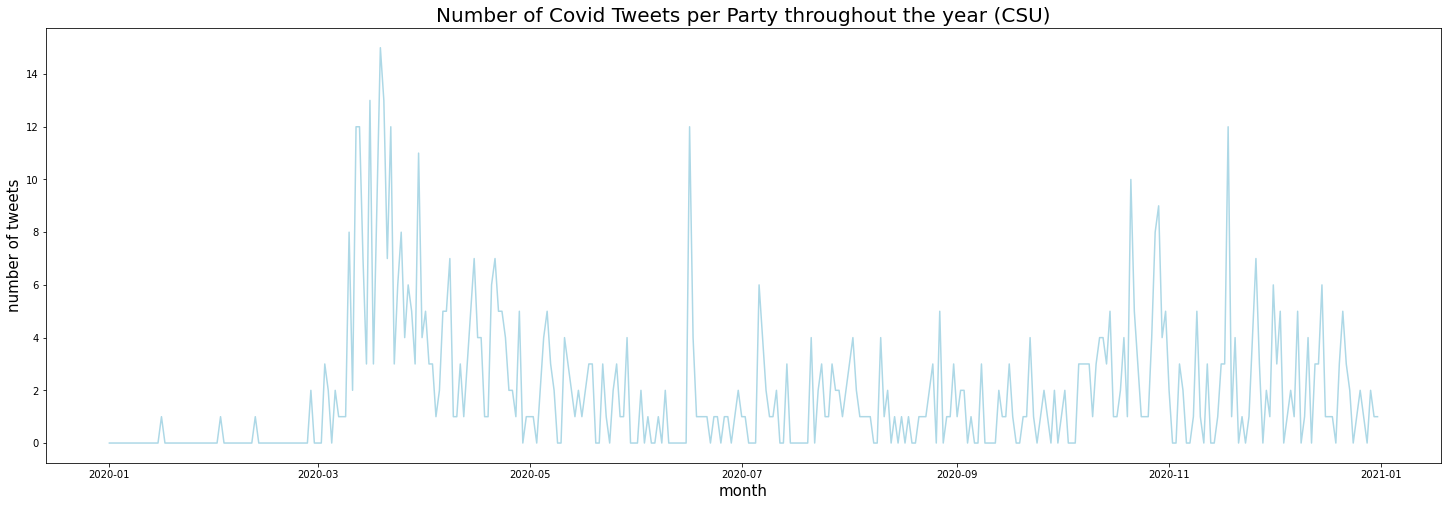

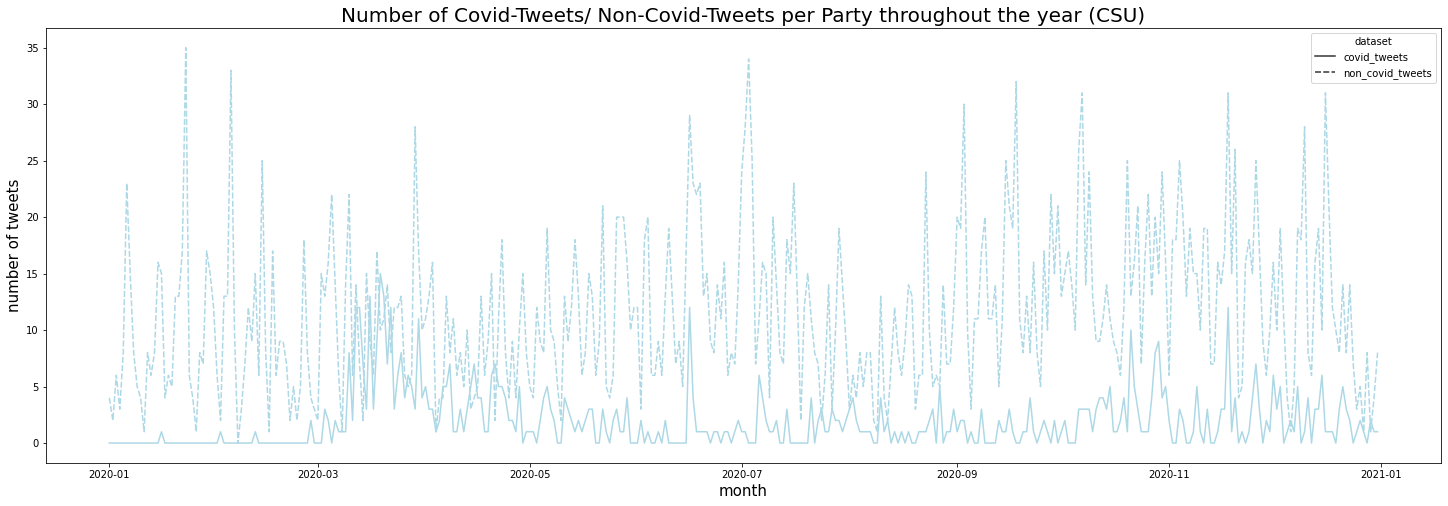

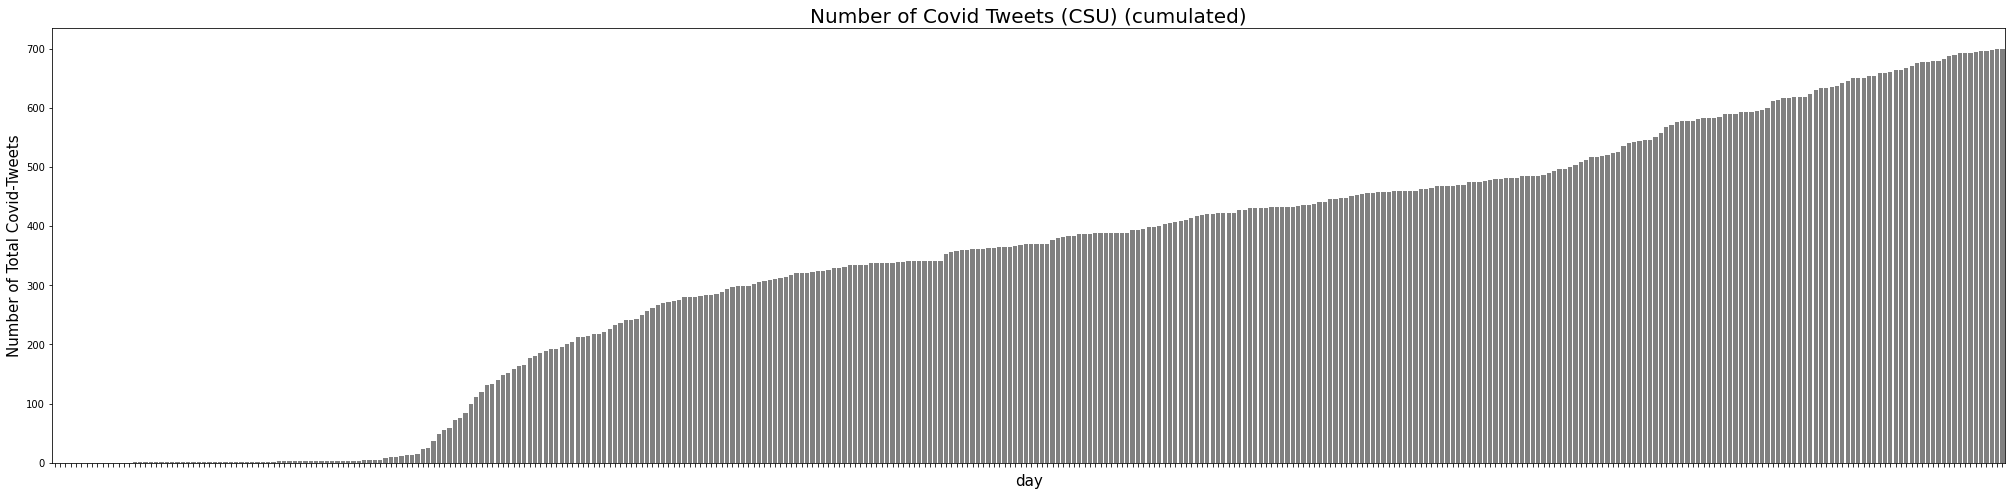

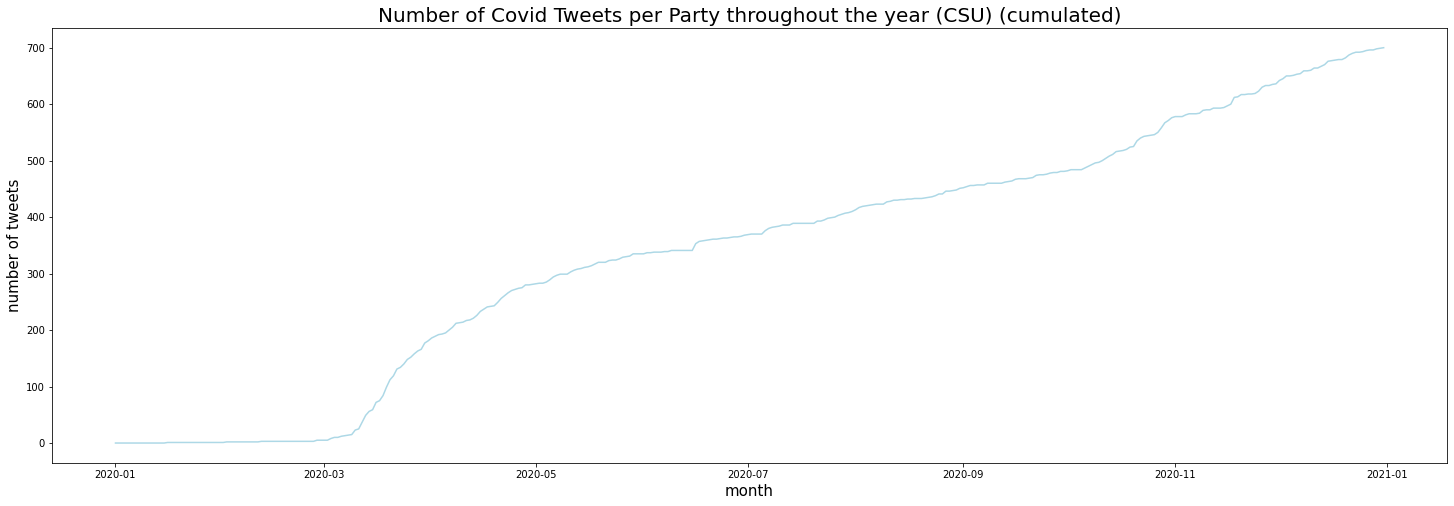

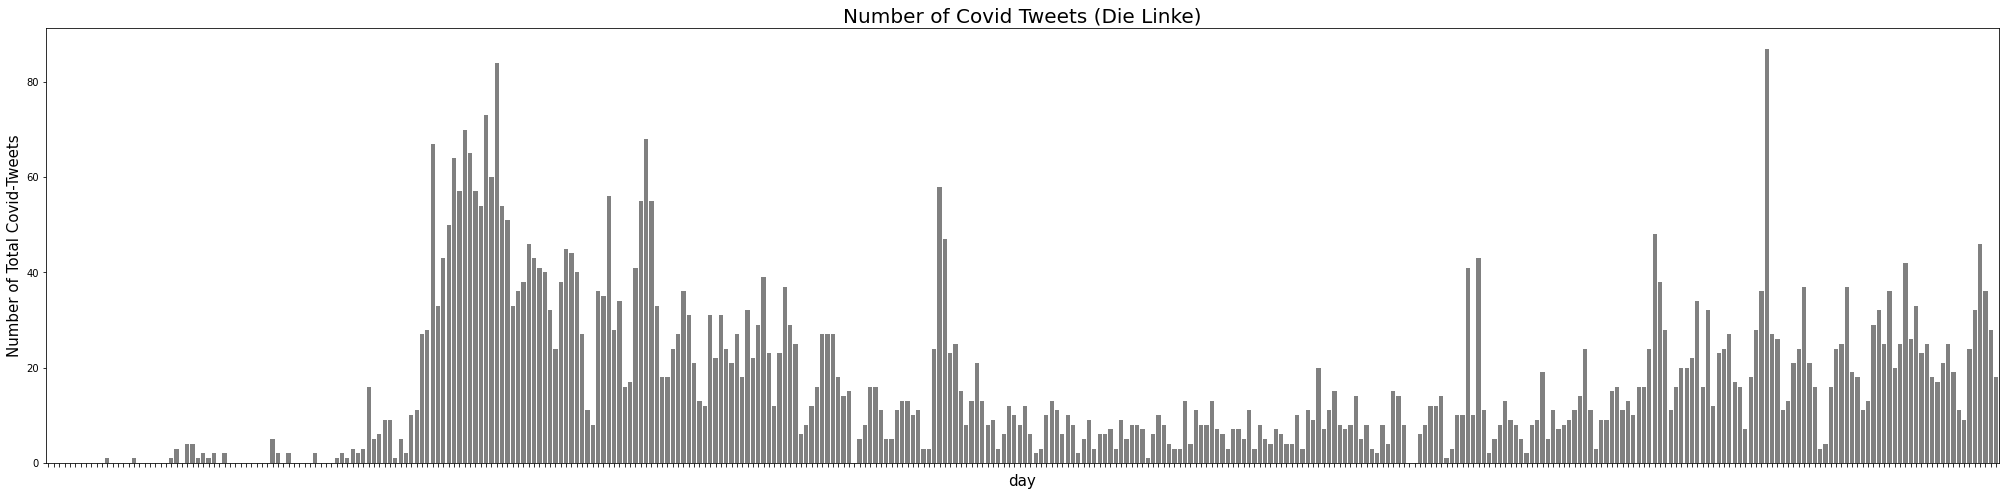

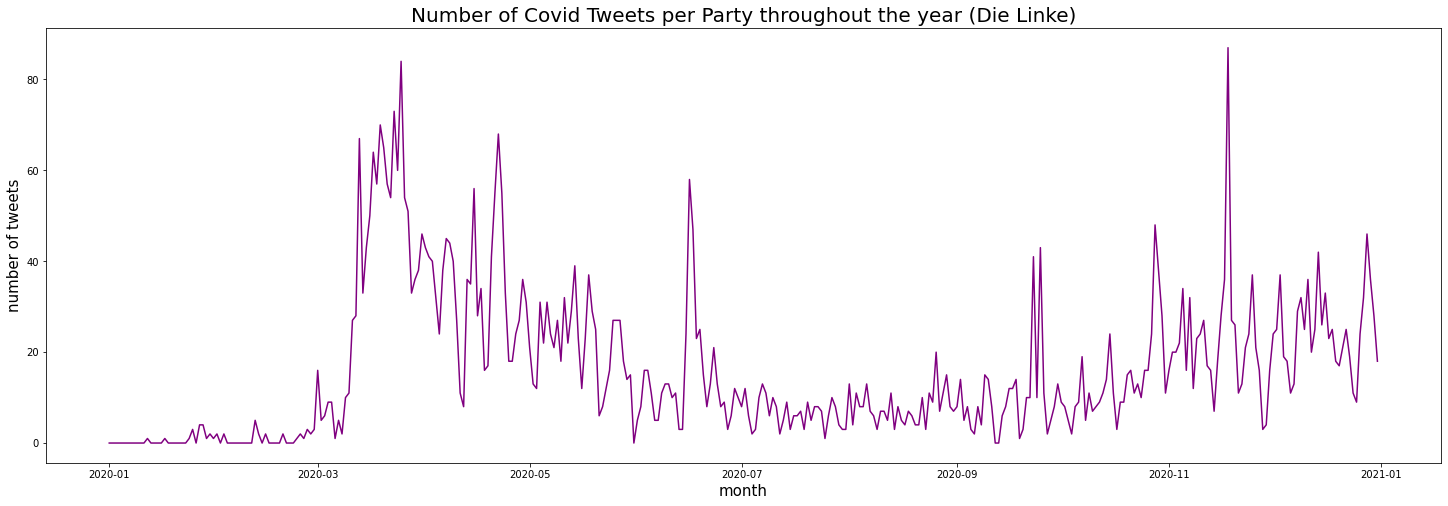

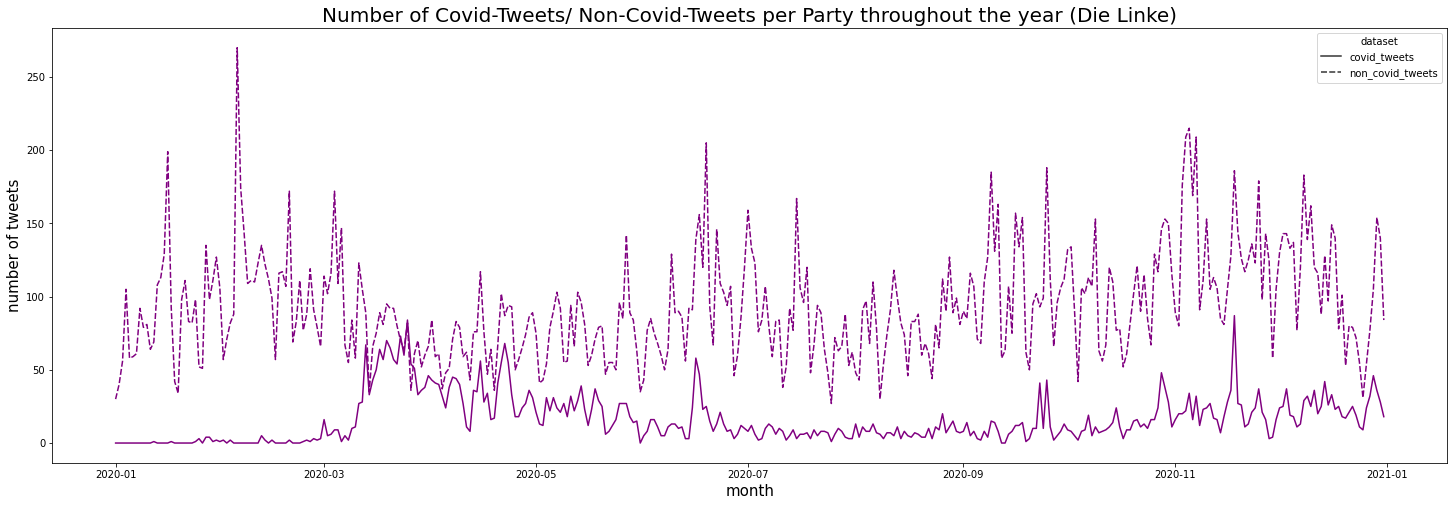

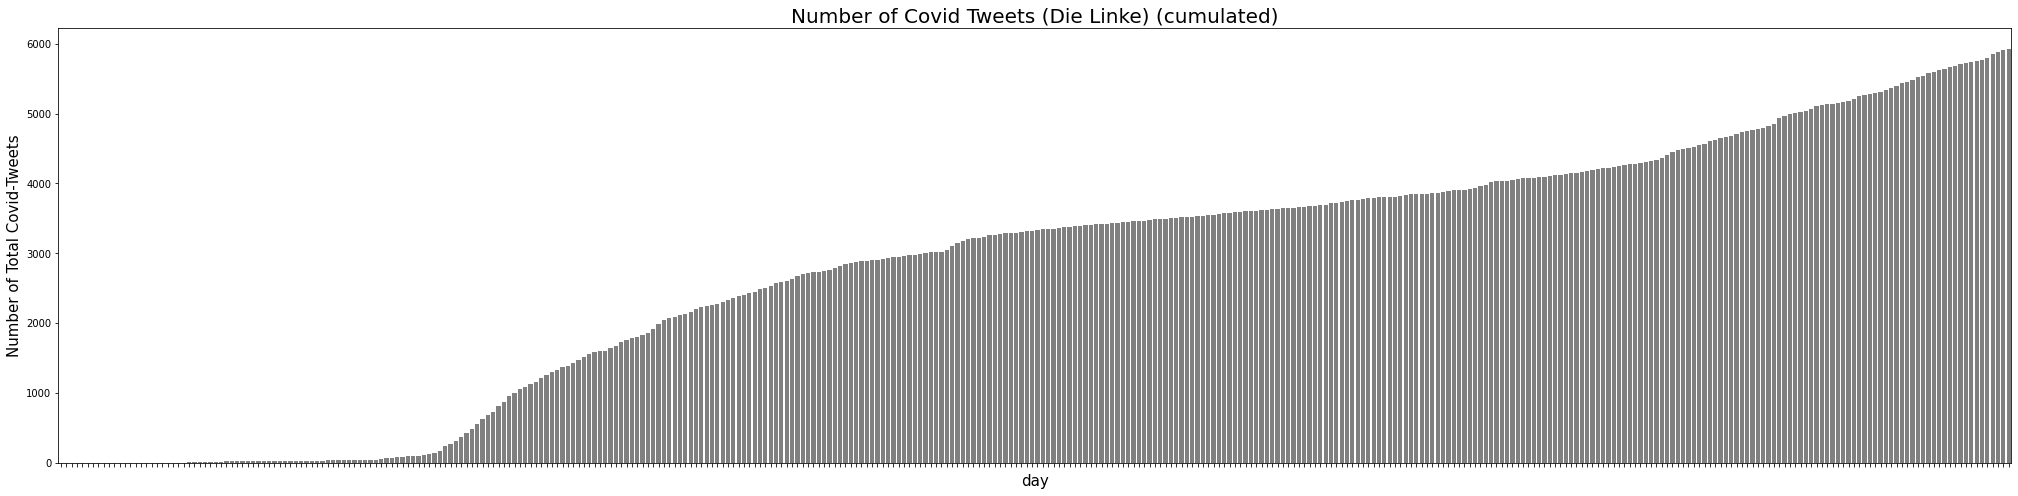

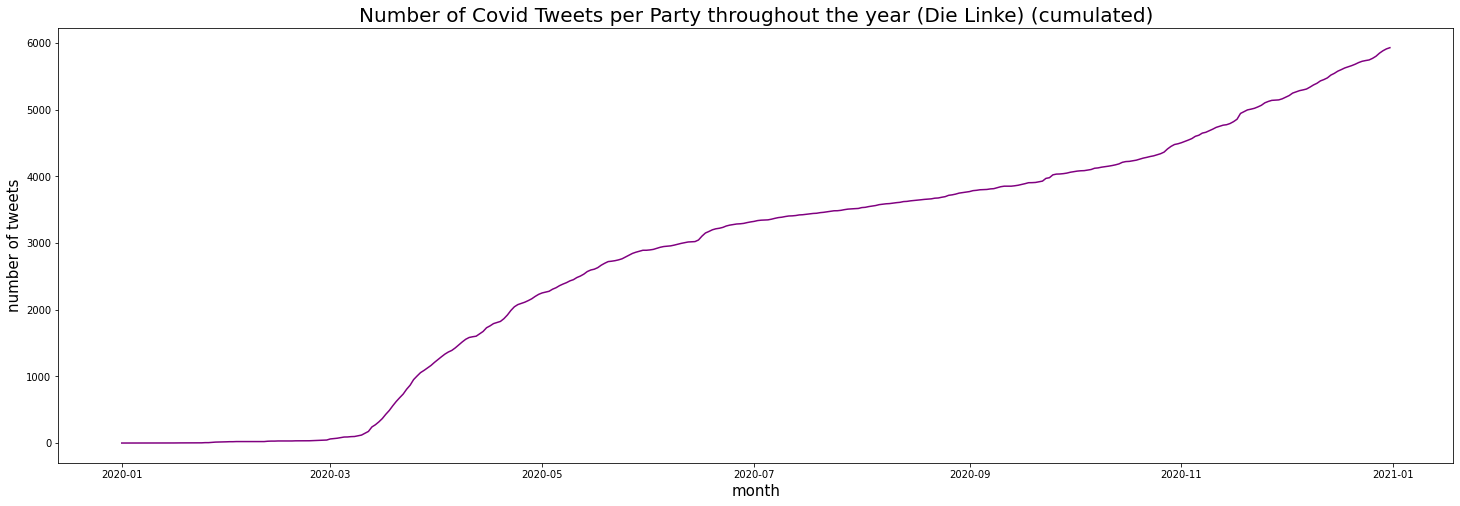

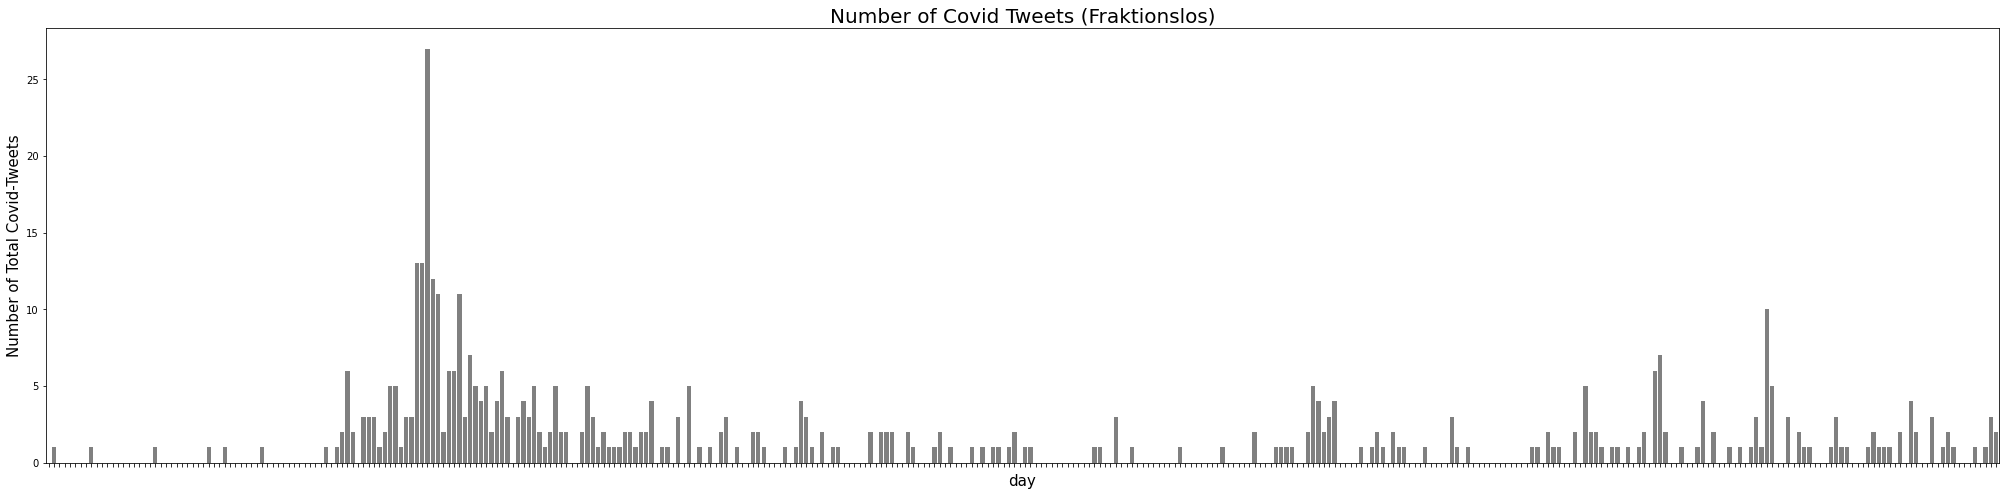

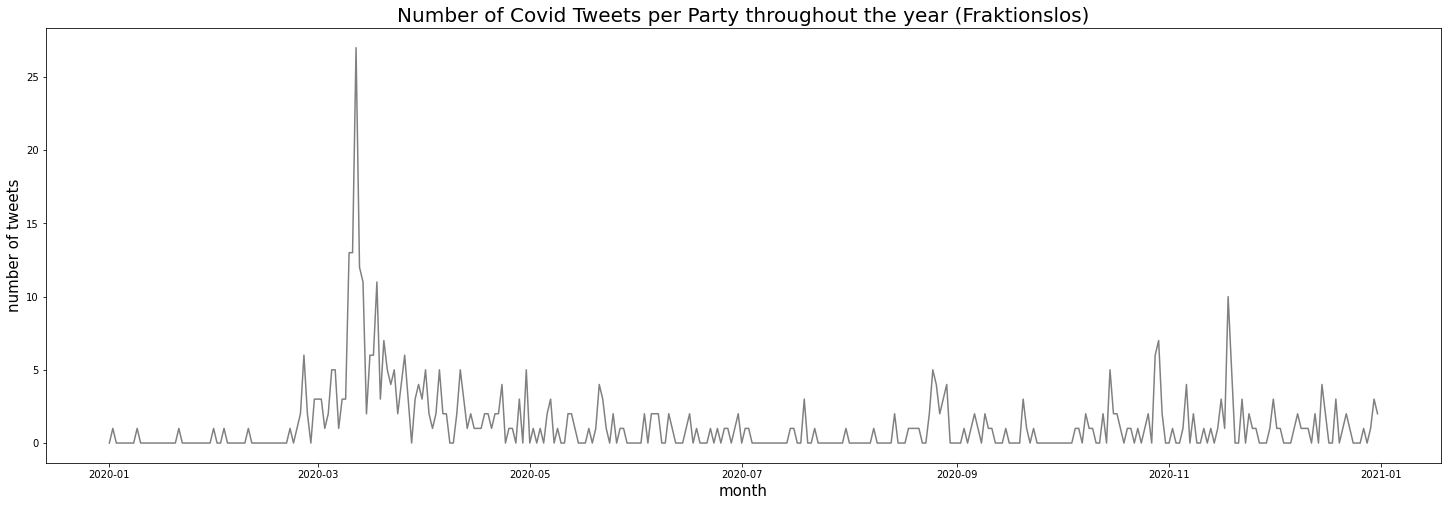

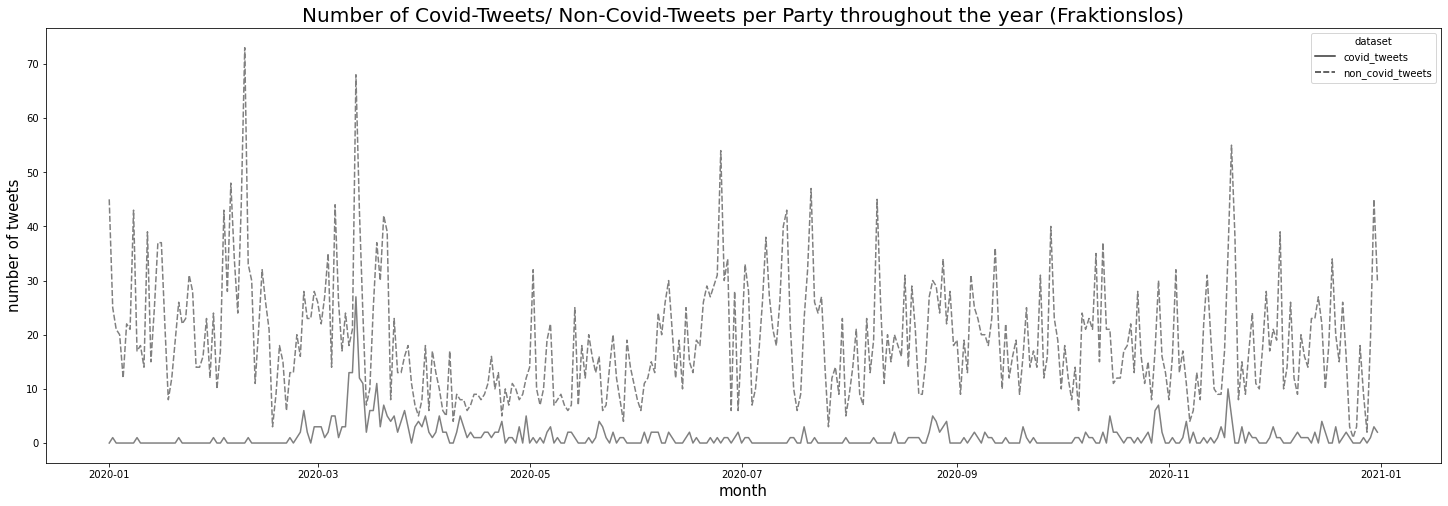

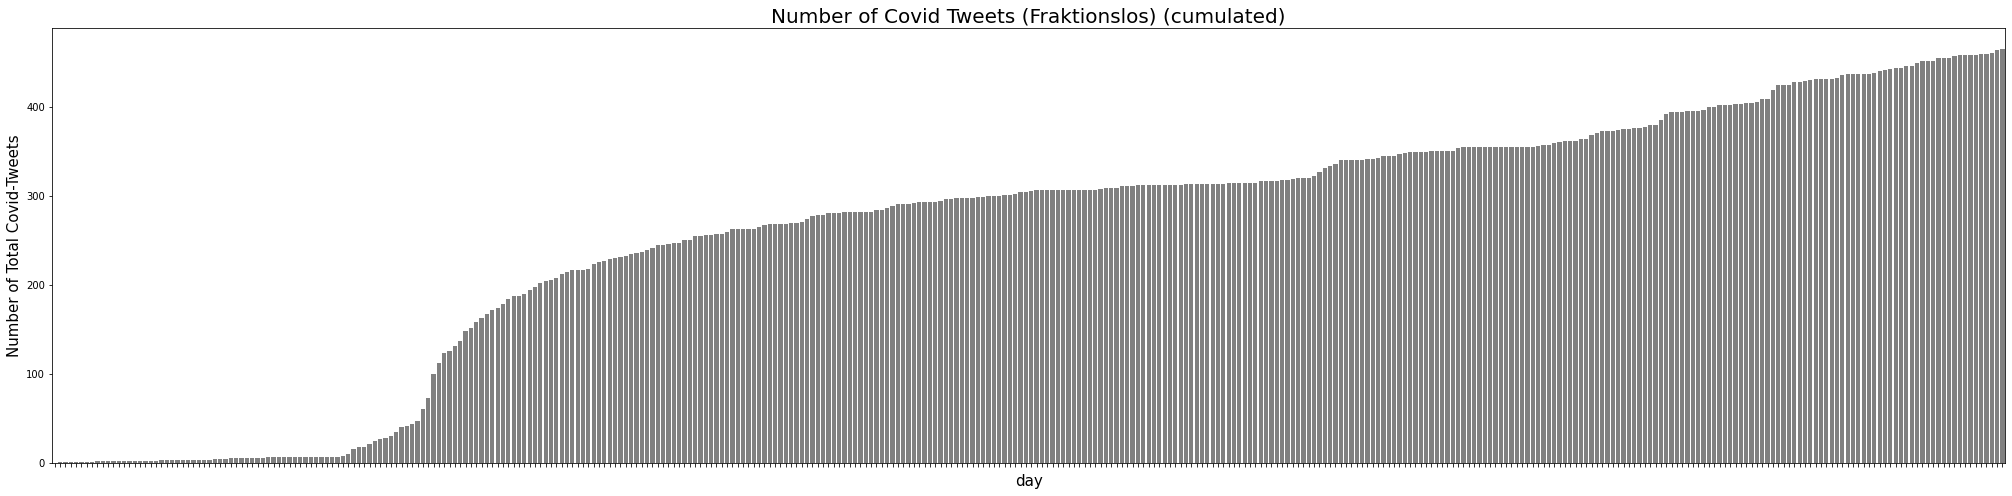

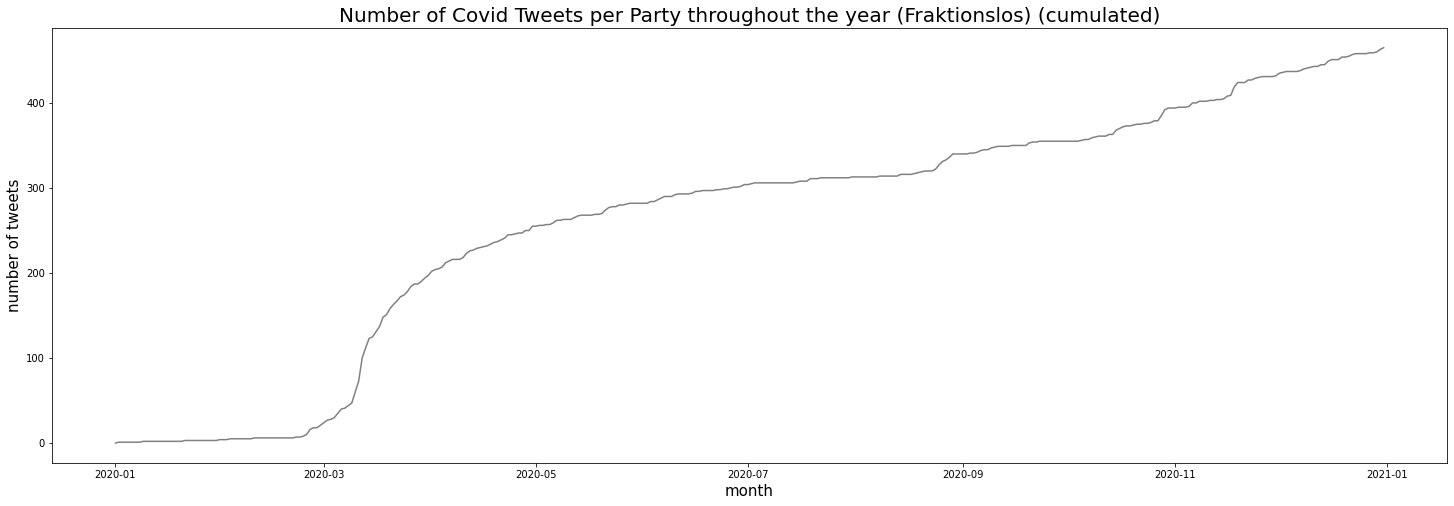

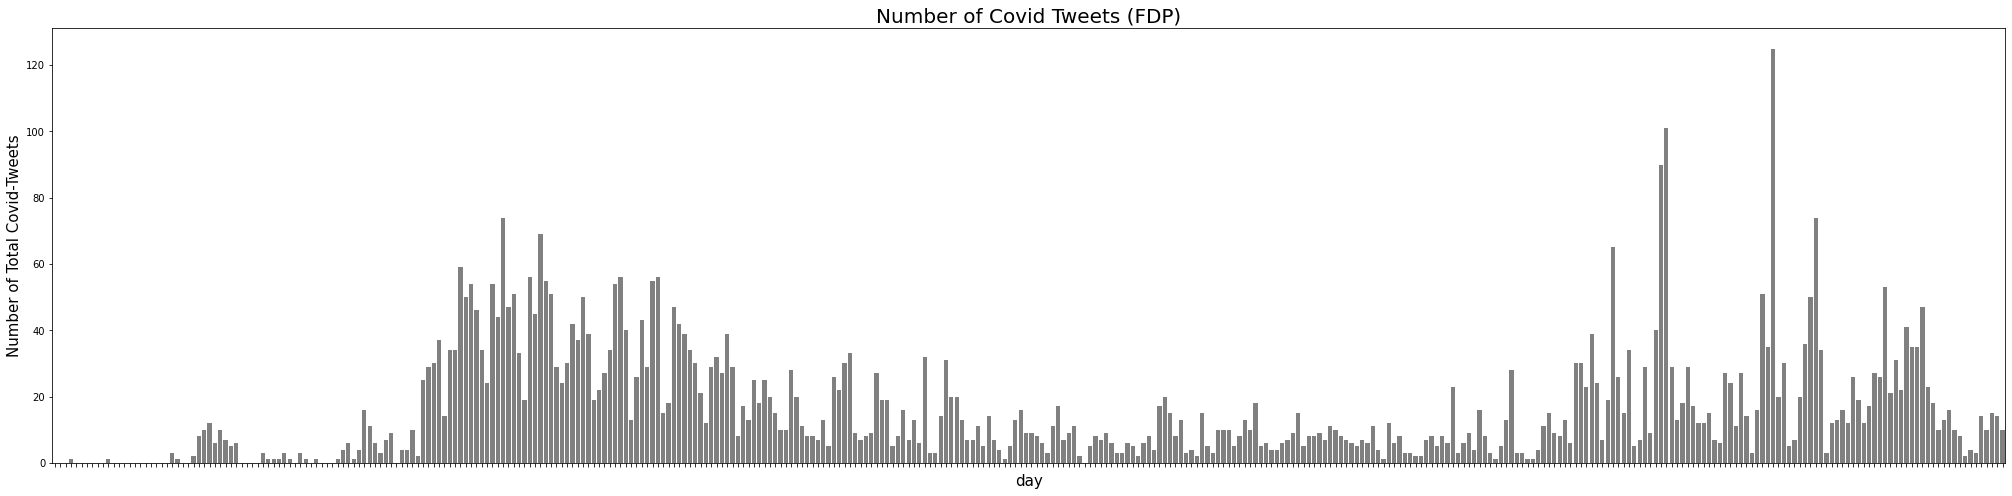

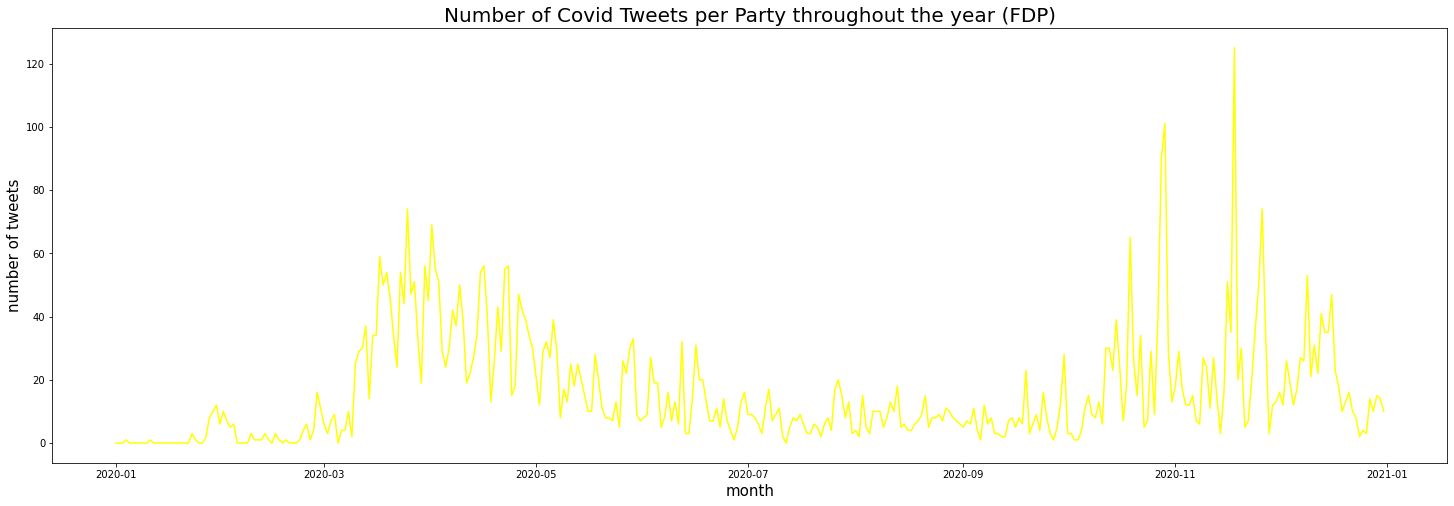

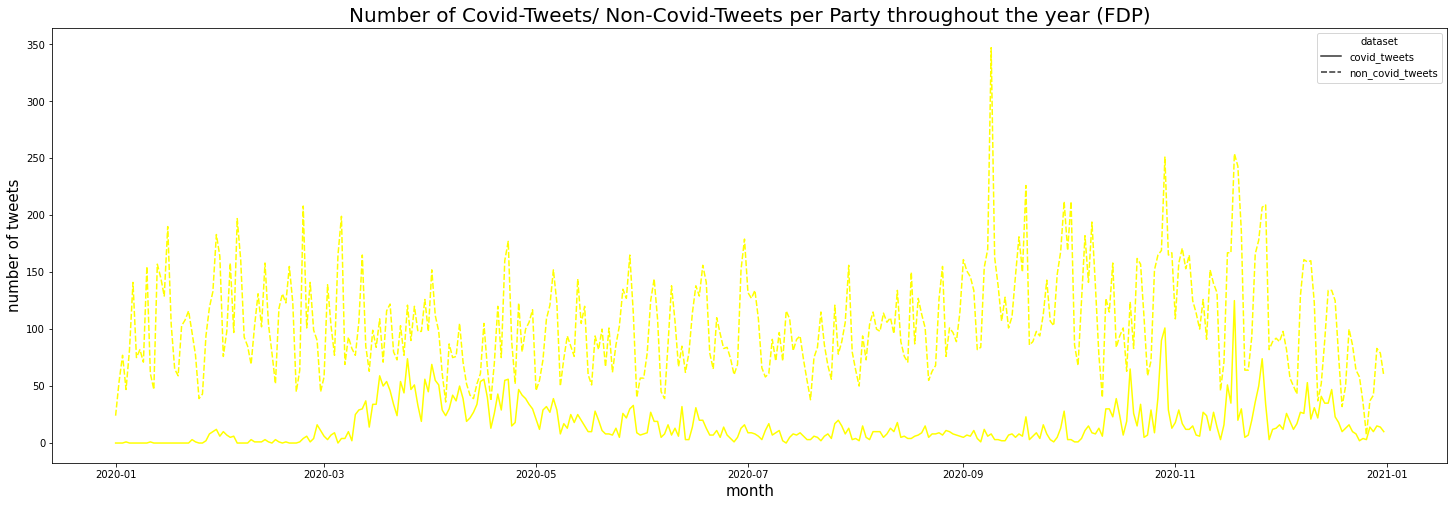

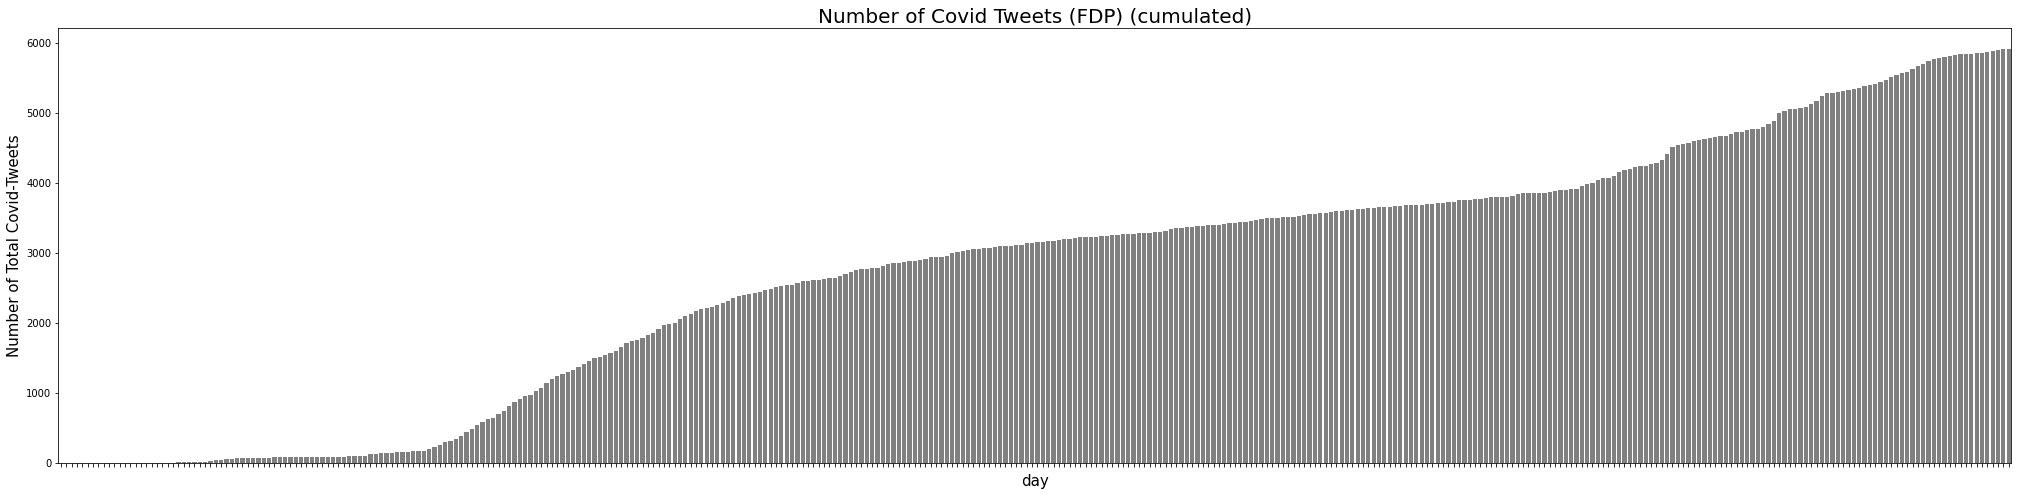

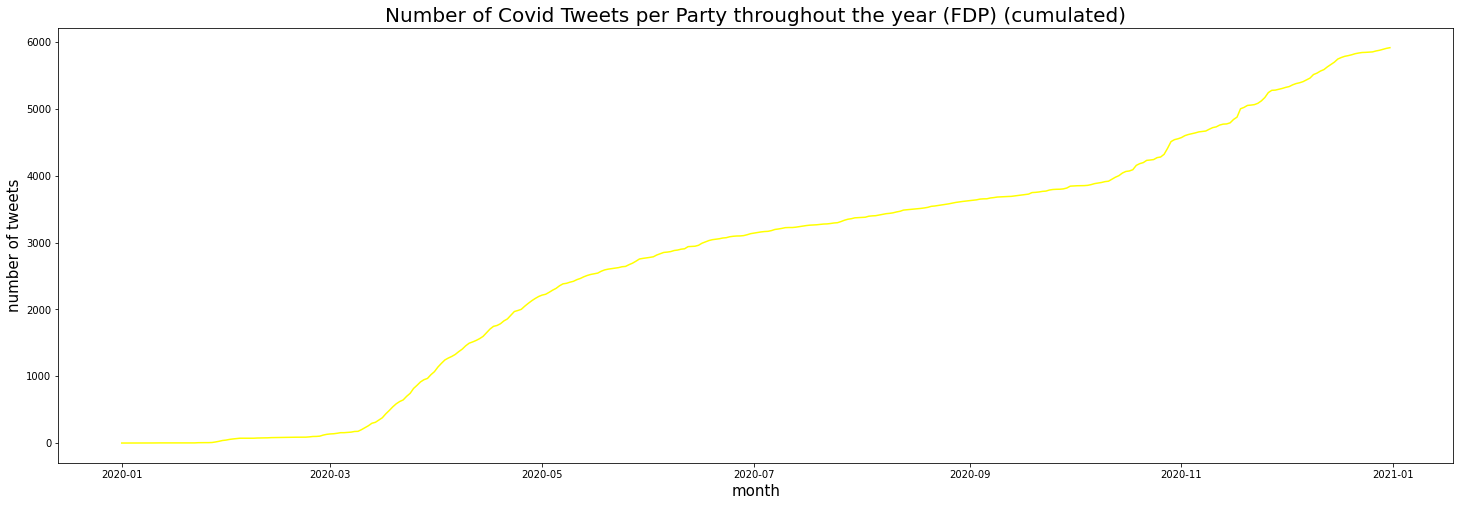

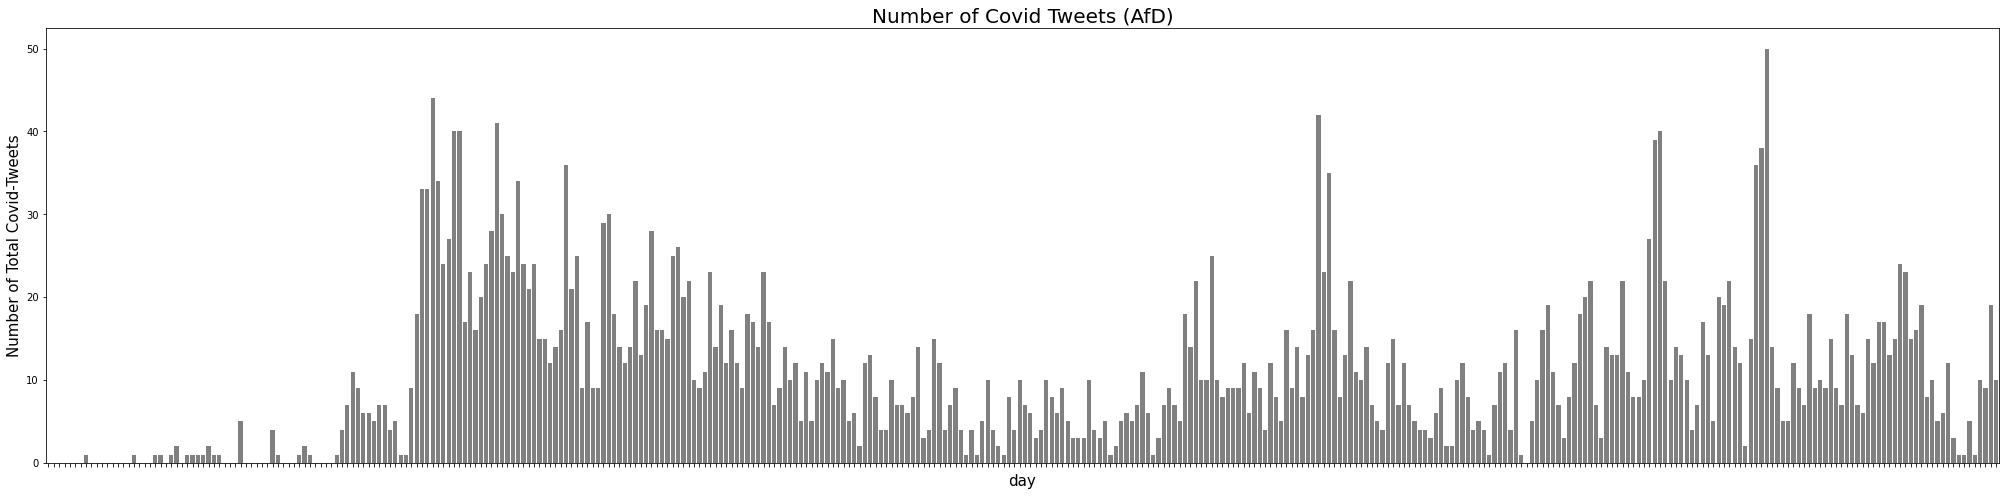

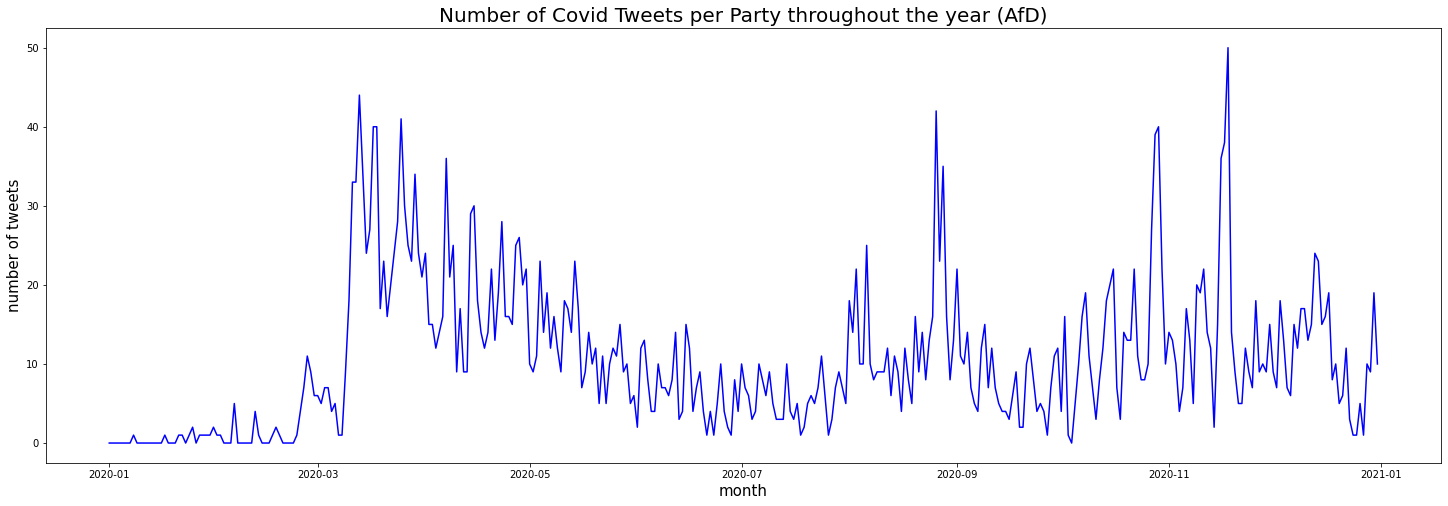

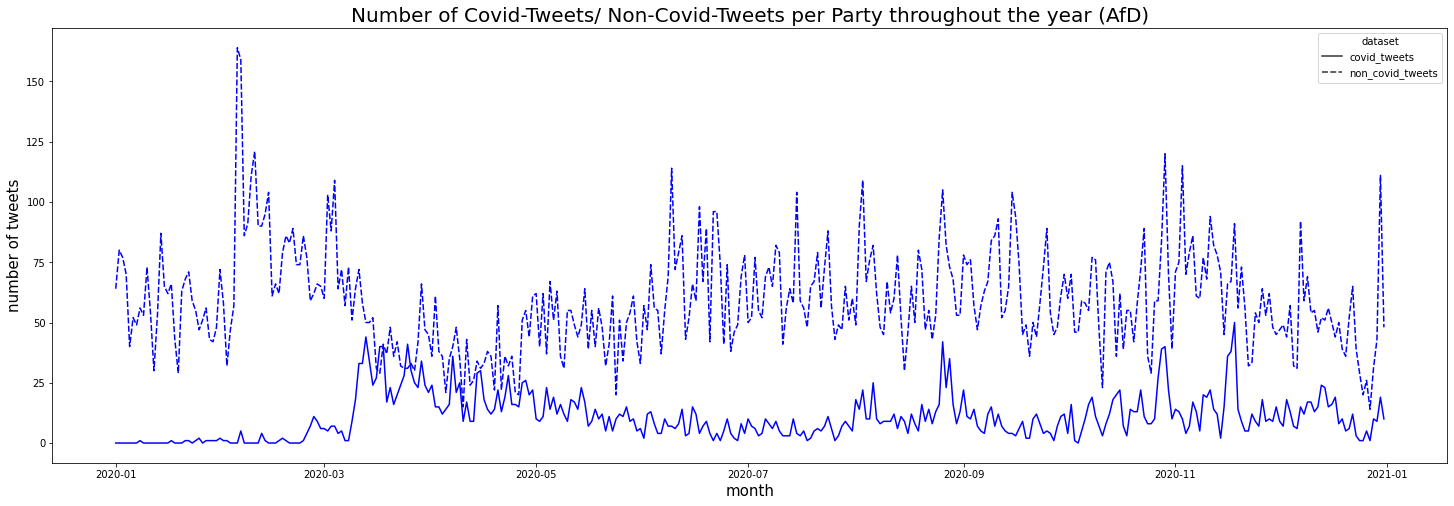

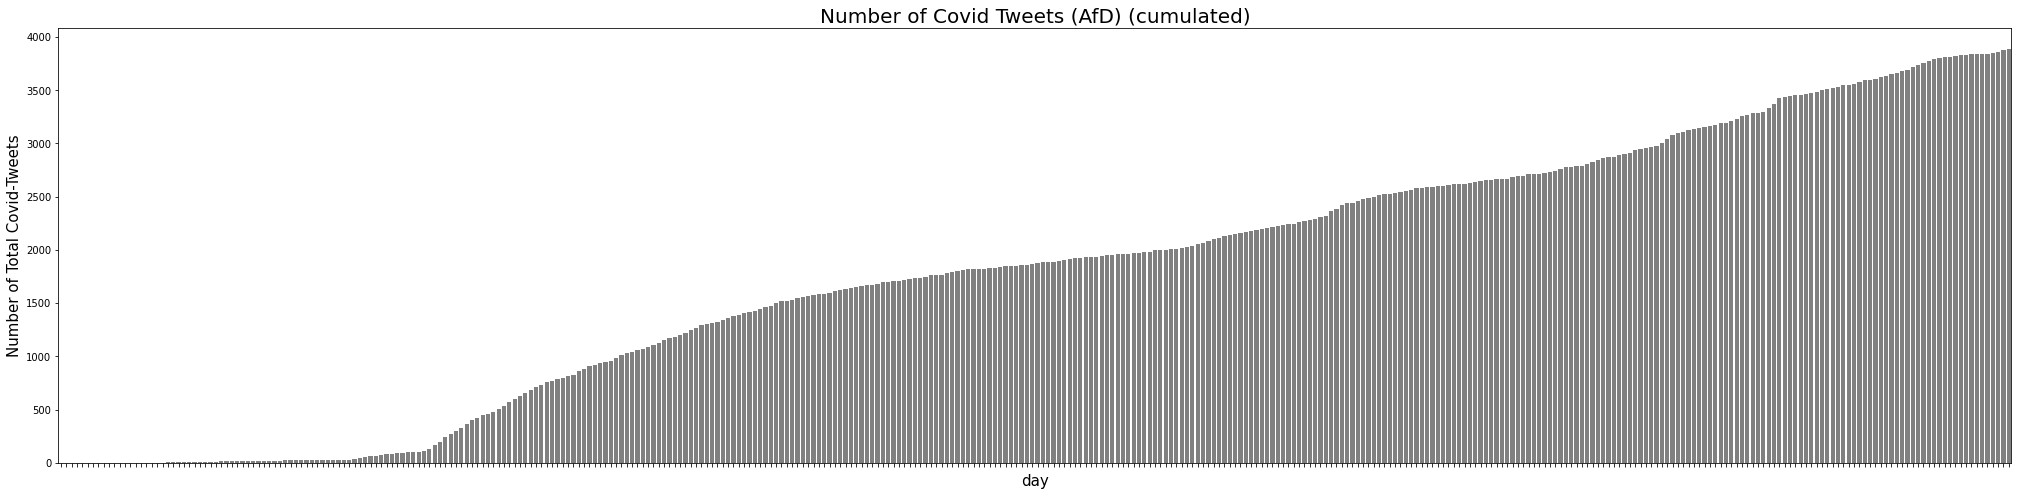

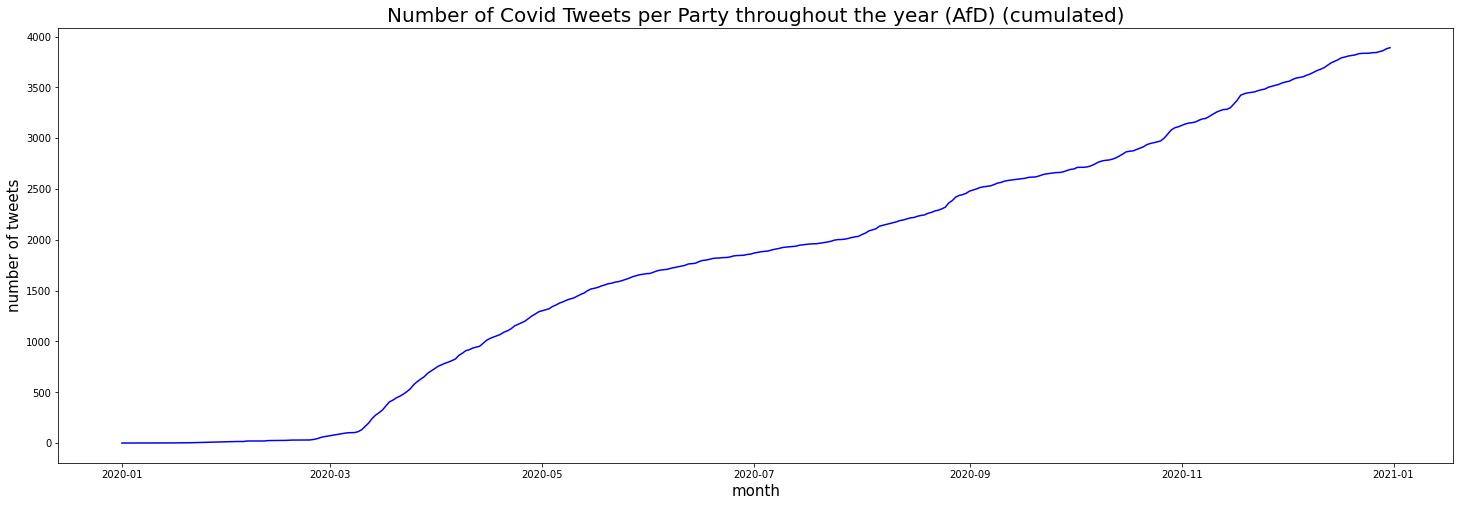

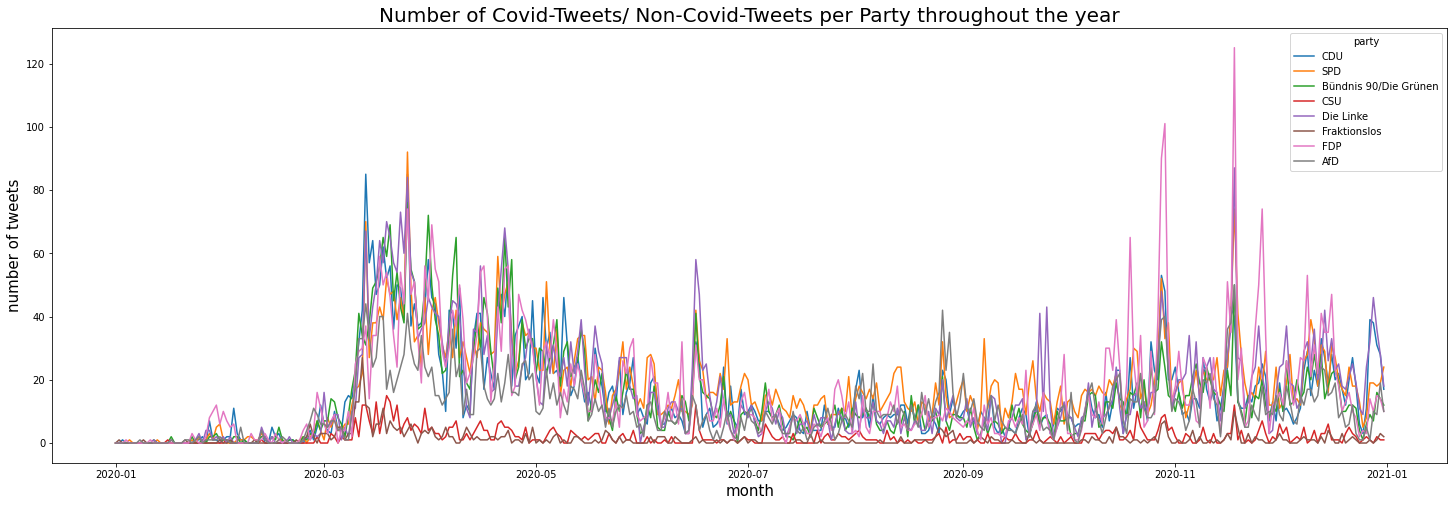

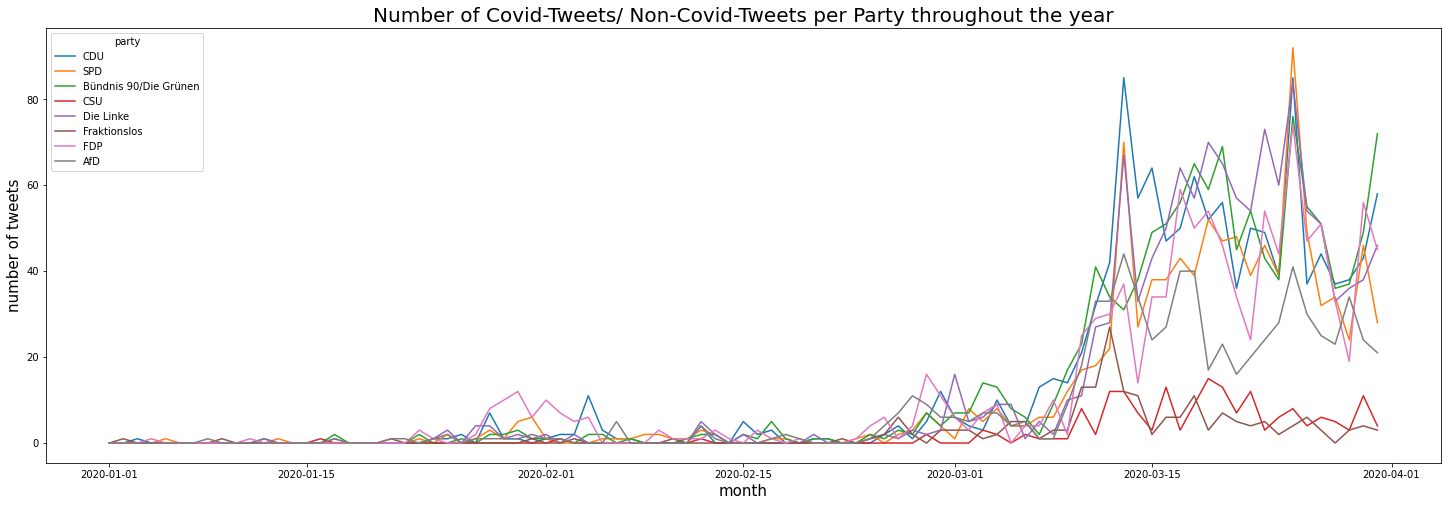

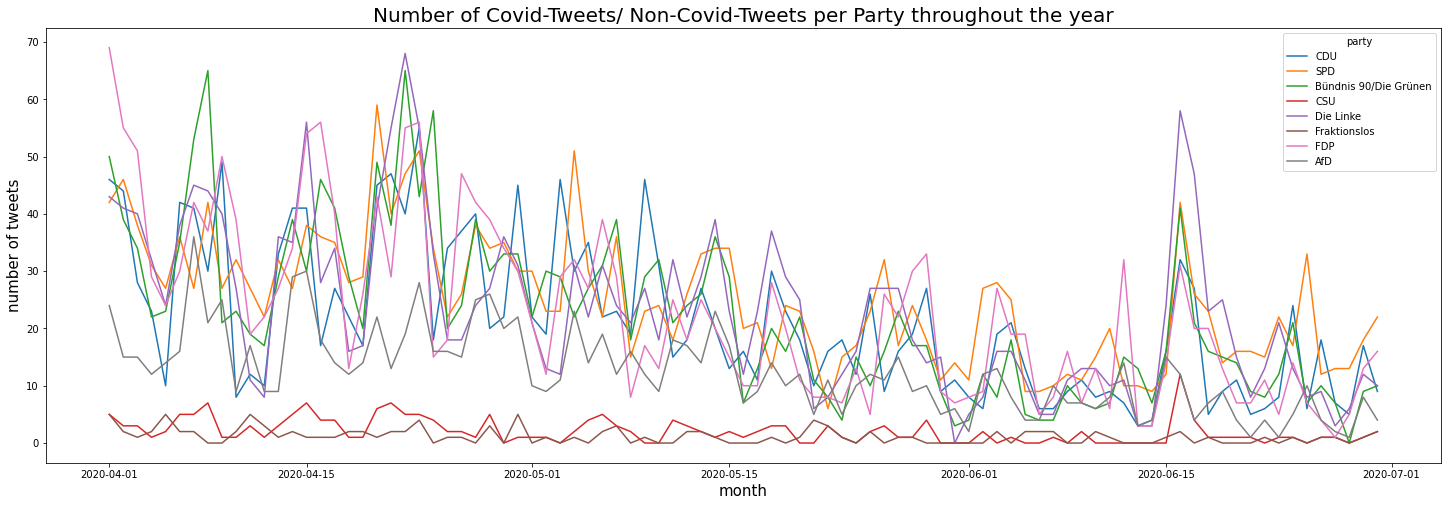

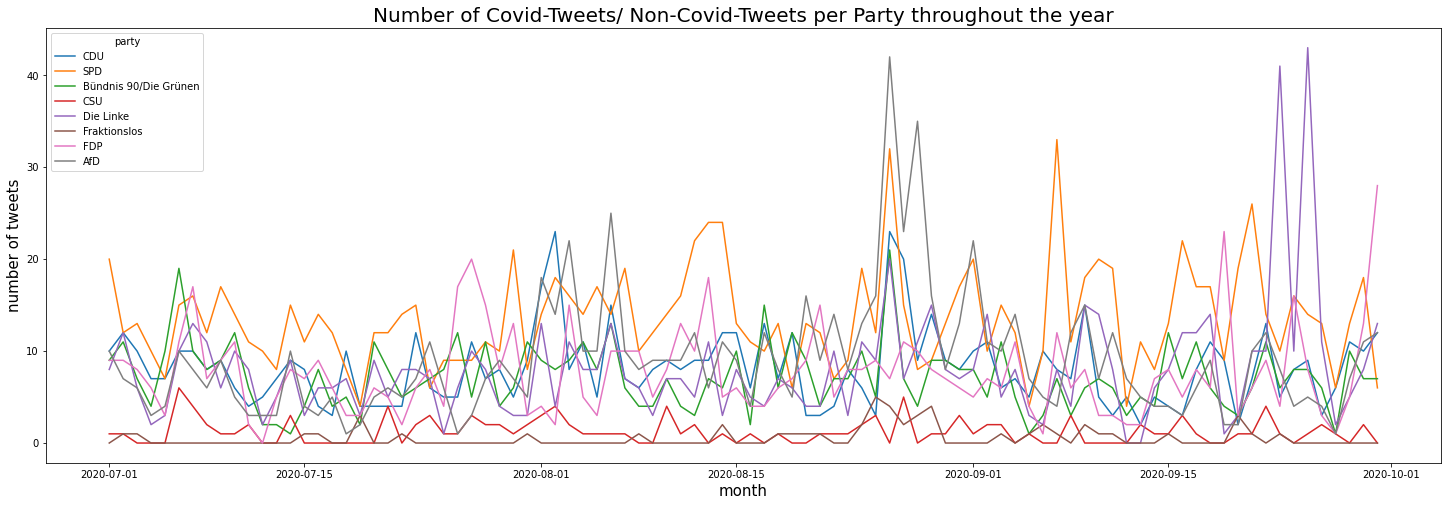

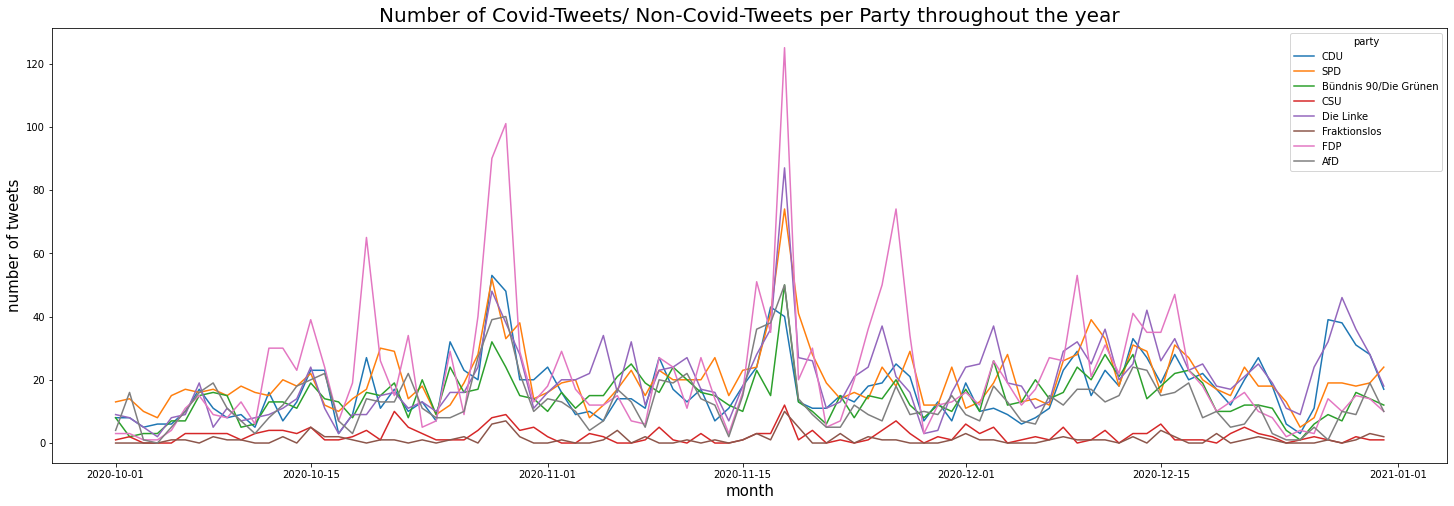

In [70]:
df_covid = df_covid_tweets_stats.copy()
df_covid = df_covid.loc[(df_covid['created at'] >= start_date) & (df_covid['created at'] <= end_date)]
df_covid.set_index('created at')

df_non_covid = df_non_covid_tweets_stats.copy()
df_non_covid = df_non_covid.loc[(df_non_covid['created at'] >= start_date) & (df_non_covid['created at'] <= end_date)]
df_all_parties = []

for i in parties:
    df_covid_per_party = df_covid[df_covid['party'] == i]
    df_covid_per_party = df_covid_per_party.pivot_table(index=['created at'], aggfunc='size')
    df_covid_per_party = df_covid_per_party.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
    df_covid_per_party = pd.DataFrame({'date':df_covid_per_party.index, 'tweets':df_covid_per_party.values})
    df_covid_per_party['date']=pd.to_datetime(df_covid_per_party['date'], utc= True).dt.date
    df_covid_per_party['party'] = i
    df_all_parties.append(df_covid_per_party)

    df_covid_tweets_per_party_year_cumulated = df_covid_per_party.copy()
    df_covid_tweets_per_party_year_cumulated['tweets']= df_covid_tweets_per_party_year_cumulated['tweets'].cumsum(axis = 0)

    df_non_covid_per_party_year = df_non_covid[df_non_covid['party'] == i]
    df_non_covid_per_party_year = df_non_covid_per_party_year.pivot_table(index=['created at'], aggfunc='size')
    df_non_covid_per_party_year = df_non_covid_per_party_year.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
    df_non_covid_per_party_year = pd.DataFrame({'date':df_non_covid_per_party_year.index, 'tweets':df_non_covid_per_party_year.values})
    df_non_covid_per_party_year['date']=pd.to_datetime(df_non_covid_per_party_year['date'], utc= True).dt.date

    concatenated_per_party_year = pd.concat([df_covid_per_party.assign(dataset='covid_tweets'), df_non_covid_per_party_year.assign(dataset='non_covid_tweets')])

    fig, ax = plt.subplots(figsize=(35,8))
    chart = sns.barplot(data=df_covid_per_party,
                        x='date',
                        y='tweets',
                        color='grey')
    ax.set_xticklabels([])
    chart.set_title(f'Number of Covid Tweets ({i})', fontsize = 20)
    chart.set_xlabel('day', fontsize = 15)
    chart.set_ylabel('Number of Total Covid-Tweets', fontsize = 15)
    plt.show()

    plt.figure(figsize=(25,8))
    chart = sns.lineplot(x='date',
                         y='tweets',
                         data=df_covid_per_party,
                         color=party_colors[i])
    plt.title(f"Number of Covid Tweets per Party throughout the year ({i})", fontsize = 20)
    plt.xlabel("month", fontsize = 15)
    plt.ylabel("number of tweets", fontsize = 15)
    plt.show()

    plt.figure(figsize=(25,8))
    chart = sns.lineplot(x='date',
                         y='tweets',
                         data=concatenated_per_party_year,
                         color=party_colors[i],
                         style='dataset')
    plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year ({i})", fontsize = 20)
    plt.xlabel("month", fontsize = 15)
    plt.ylabel("number of tweets", fontsize = 15)
    plt.show()

    fig, ax = plt.subplots(figsize=(35,8))
    chart = sns.barplot(data=df_covid_tweets_per_party_year_cumulated,
                        x='date',
                        y='tweets',
                        color='grey')
    ax.set_xticklabels([])
    chart.set_title(f'Number of Covid Tweets ({i}) (cumulated)', fontsize = 20)
    chart.set_xlabel('day', fontsize = 15)
    chart.set_ylabel('Number of Total Covid-Tweets', fontsize = 15)
    plt.show()

    plt.figure(figsize=(25,8))
    chart = sns.lineplot(x='date',
                         y='tweets',
                         data=df_covid_tweets_per_party_year_cumulated,
                         color=party_colors[i])
    plt.title(f"Number of Covid Tweets per Party throughout the year ({i}) (cumulated)", fontsize = 20)
    plt.xlabel("month", fontsize = 15)
    plt.ylabel("number of tweets", fontsize = 15)
    plt.show()

df_all_parties = pd.concat(df_all_parties)

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=df_all_parties,
                     hue='party',
                     color=party_colors)
plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

df_all_parties_quartal_1 = df_all_parties.copy()
start_date_quartal_1 = pd.to_datetime('01/1/2020', utc= True)
end_date_quartal_1 = pd.to_datetime('03/31/2020', utc= True)
df_all_parties_quartal_1 = df_all_parties_quartal_1.loc[(df_all_parties_quartal_1['date'] >= start_date_quartal_1) & (df_all_parties_quartal_1['date'] <= end_date_quartal_1)]

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=df_all_parties_quartal_1,
                     hue='party',
                     color=party_colors)
plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

df_all_parties_quartal_2 = df_all_parties.copy()
start_date_quartal_2 = pd.to_datetime('04/1/2020', utc= True)
end_date_quartal_2 = pd.to_datetime('06/30/2020', utc= True)
df_all_parties_quartal_2 = df_all_parties_quartal_2.loc[(df_all_parties_quartal_2['date'] >= start_date_quartal_2) & (df_all_parties_quartal_2['date'] <= end_date_quartal_2)]

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=df_all_parties_quartal_2,
                     hue='party',
                     color=party_colors)
plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

df_all_parties_quartal_3 = df_all_parties.copy()
start_date_quartal_3 = pd.to_datetime('07/1/2020', utc= True)
end_date_quartal_3 = pd.to_datetime('09/30/2020', utc= True)
df_all_parties_quartal_3 = df_all_parties_quartal_3.loc[(df_all_parties_quartal_3['date'] >= start_date_quartal_3) & (df_all_parties_quartal_3['date'] <= end_date_quartal_3)]

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date',
                     y='tweets',
                     data=df_all_parties_quartal_3,
                     hue='party',
                     color=party_colors)
plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

df_all_parties_quartal_4 = df_all_parties.copy()
start_date_quartal_4 = pd.to_datetime('10/1/2020', utc= True)
end_date_quartal_4 = pd.to_datetime('12/31/2020', utc= True)
df_all_parties_quartal_4 = df_all_parties_quartal_4.loc[(df_all_parties_quartal_4['date'] >= start_date_quartal_4) & (df_all_parties_quartal_4['date'] <= end_date_quartal_4)]

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date', y='tweets', data=df_all_parties_quartal_4, hue='party', color=party_colors)
plt.title(f"Number of Covid-Tweets/ Non-Covid-Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

